# **Logistic Regression (Mathematical Explanation)**  

## **1. Key Concepts**  
- **Binary Classification**: Predicts $P(y=1 | \mathbf{x})$, the probability that $y=1$ given input features $\mathbf{x}$.  
- **Sigmoid Function**: Maps linear combinations of inputs to a probability between $0$ and $1$.  

---

## **2. The Sigmoid Function**  
The core of logistic regression is the **sigmoid (logistic) function**:  

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$  

- $z = \mathbf{w}^T \mathbf{x} + b$ (linear combination of weights $\mathbf{w}$ and features $\mathbf{x}$, with bias $b$).  
- Output $\sigma(z) \in (0,1)$.  

---

## **3. Hypothesis Representation**  
The predicted probability $\hat{y} = P(y=1 | \mathbf{x})$ is:  

$$
\hat{y} = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
$$  

---

## **4. Cost Function (Log Loss)**  
Logistic regression uses **cross-entropy loss**:  

$$
J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$  

- $m$ = number of training examples.  
- $y^{(i)}$ = true label ($0$ or $1$).  
- $\hat{y}^{(i)}$ = predicted probability.  

**Intuition**:  
- If $y=1$, cost $\rightarrow \infty$ when $\hat{y} \rightarrow 0$.  
- If $y=0$, cost $\rightarrow \infty$ when $\hat{y} \rightarrow 1$.  

---

## **5. Gradient Descent Optimization**  
Update weights $\mathbf{w}$ and bias $b$ to minimize $J(\mathbf{w}, b)$:  

$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j}
$$  
$$
b := b - \alpha \frac{\partial J}{\partial b}
$$  

Where:  
- $\alpha$ = learning rate.  
- The gradients are:  

$$
\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}
$$  
$$
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
$$  

---

## **6. Decision Boundary**  
- If $\hat{y} \geq 0.5$, predict $y=1$.  
- If $\hat{y} < 0.5$, predict $y=0$.  
- The boundary is where $\mathbf{w}^T \mathbf{x} + b = 0$.  

---

## **7. Multiclass Logistic Regression (Softmax)**  
For $K > 2$ classes, use **softmax regression**:  

$$
P(y=k | \mathbf{x}) = \frac{e^{\mathbf{w}_k^T \mathbf{x}}}{\sum_{j=1}^K e^{\mathbf{w}_j^T \mathbf{x}}}
$$  

---

## **8. Assumptions & Limitations**  
- Assumes a **linear decision boundary** (use feature engineering for non-linear cases).  
- Sensitive to **outliers** (but less than linear regression).  
- Requires **large datasets** for stable weight estimates.  

---

## **Example in Python (Scikit-learn)**  
```python
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression()  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
```  



### Example: Coin Flipping with Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP)

Imagine you flip a coin 10 times and get 7 heads. You want to estimate the probability of getting heads, denoted as $\theta$. Is the coin fair ($\theta = 0.5$) or biased? We’ll use MLE and MAP to find $\theta$.

---

#### **MLE: Trust Only the Data**
MLE picks the $\theta$ that makes the observed data (7 heads in 10 flips) most likely.

- You got 7 heads and 3 tails. The probability of this happening is modeled as:
  $$
  P(\text{data}) = \theta^7 (1 - \theta)^3
  $$
- MLE finds the $\theta$ that maximizes this. Intuitively, it’s like asking: “What $\theta$ best explains 7 heads out of 10 flips?”
- Without diving into calculus, the answer is the proportion of heads:
  $$
  \theta_{\text{MLE}} = \frac{\text{number of heads}}{\text{total flips}} = \frac{7}{10} = 0.7
  $$
- **Interpretation**: MLE says the probability of heads is 0.7, based purely on the data. If you got no prior beliefs, this is your best guess.

---

#### **MAP: Combine Data with a Prior Belief**
MAP also uses the data but adds a “prior belief” about $\theta$. Let’s assume you think the coin is probably fair ($\theta \approx 0.5$) but you’re open to it being slightly biased. We model this with a simple prior called a **Beta(2, 2)** prior, which favors $\theta$ near 0.5 but allows flexibility.

- The Beta(2, 2) prior is like saying, “Before flipping, I believe the coin is fair, as if I’ve seen 2 heads and 2 tails in the past.”
- MAP combines:
  - **Data**: 7 heads, 3 tails from 10 flips.
  - **Prior**: 2 “imaginary” heads, 2 “imaginary” tails.
- Add them together:
  - Total heads = 7 (data) + 2 (prior) = 9
  - Total flips = 10 (data) + 4 (prior) = 14
- MAP estimate:
  $$
  \theta_{\text{MAP}} = \frac{\text{total heads}}{\text{total flips}} = \frac{9}{14} \approx 0.643
  $$
- **Interpretation**: MAP says the probability of heads is about 0.643. It’s closer to 0.5 than MLE (0.7) because the prior belief in a fair coin “pulls” the estimate toward 0.5.

---

### Key Difference
- **MLE**: Only uses the data (7 heads, 10 flips) → $\theta = 0.7$.
- **MAP**: Combines data with a prior belief (like 2 heads, 2 tails) → $\theta \approx 0.643$, which is smoothed toward a fair coin.

This smoothing is helpful when you have little data. For example, if you flipped the coin once and got 1 head, MLE would say $\theta = 1.0$ (100% heads), which is extreme. MAP, with the Beta(2, 2) prior, would give $\theta = \frac{1 + 2}{1 + 4} = \frac{3}{5} = 0.6$, a more cautious estimate.

---


### **Linear Regression Recap**

Linear regression models a continuous target value:

$$
y = \vec{\theta}^\intercal \vec{x} + b
$$

- The cost function is usually **Mean Squared Error (MSE)**.
- We use **regularization** (like L2/Ridge or L1/Lasso) to reduce overfitting.

---

### **Motivation for Classification**

> What if our target $y$ is not a continuous number, but a **class label** — like “spam” or “not spam”?

- Linear regression doesn't work well for classification:
  - It can predict values outside the $[0, 1]$ range.
  - It doesn’t model probabilities naturally.

---


---

## Logistic Regression

Logistic regression is a binary classification algorithm used to predict the probability that an instance belongs to one of two classes (e.g., 0 or 1). It models the relationship between input features and the probability of a specific outcome using the **sigmoid function**, which maps any real-valued number to the range $(0, 1)$. The model is trained by maximizing the likelihood of the observed data, typically using gradient-based optimization.

### Key Components
1. **Sigmoid Function**: Converts a linear combination of features into a probability.
2. **Decision Boundary**: Separates the two classes based on a probability threshold (usually 0.5).
3. **Maximum Likelihood Estimation (MLE)**: Optimizes the model parameters to best fit the training data.

---

## 1. Sigmoid Function

The sigmoid function is defined as:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z = \vec{\theta}^\intercal \vec{x} + b$ is a linear combination of:
- $\vec{x}$: Input feature vector.
- $\vec{\theta}$: Weight vector (model parameters).
- $b$: Bias term.

### Properties
- **Range**: $\sigma(z) \in (0, 1)$, making it ideal for modeling probabilities.
- **Interpretation**: $\sigma(z) = P(y=1|\vec{x})$, the probability of class 1 given input $\vec{x}$.
- **Complement**: $P(y=0|\vec{x}) = 1 - \sigma(z)$.

### Why Use $e^x$ in the Sigmoid?
The exponential function $e^x$ is chosen because:
1. **Non-linearity**: Introduces non-linear behavior, allowing the model to capture complex patterns.
2. **Differentiability**: $e^x$ has a simple derivative, facilitating gradient-based optimization.
3. **Convexity**: The resulting log-likelihood is convex, ensuring a single global minimum during optimization.

Other bases (e.g., $2^x$) could work but lack the mathematical convenience of $e^x$.

---


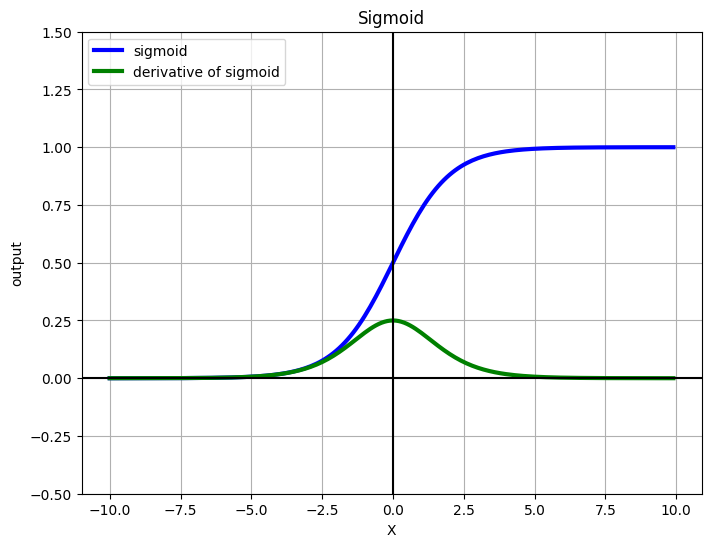

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

X = np.arange(-10, 10, 0.1)
fig = plt.figure(figsize=(8, 6))
plt.plot(X, sigmoid(X), label='sigmoid', c='blue', linewidth=3)
plt.plot(X, grad_sigmoid(X), label='derivative of sigmoid', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X')
plt.grid(True)
plt.ylim([-0.5, 1.5])
plt.ylabel('output')
plt.title('Sigmoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## 2. Decision Boundary

The decision boundary is the set of points where the predicted probability is 0.5:

$$\sigma(z) = 0.5 \implies z = 0 \implies \vec{\theta}^\intercal \vec{x} + b = 0$$

This equation defines a **hyperplane** in the feature space:
- If $z > 0$, then $\sigma(z) > 0.5$, and the instance is classified as class 1.
- If $z < 0$, then $\sigma(z) < 0.5$, and the instance is classified as class 0.

---

## 3. Model Formulation

Logistic regression assumes the class posterior probabilities follow the sigmoid form:

$$P(C_1|\vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x} + b)$$

$$P(C_2|\vec{x}) = 1 - P(C_1|\vec{x}) = 1 - \sigma(\vec{\theta}^\intercal \vec{x} + b)$$

Here, $\vec{x}$ may be raw features or transformed features $\phi(\vec{x})$ (e.g., polynomial features).

---

## 4. Training with Maximum Likelihood Estimation (MLE)

The goal is to find the parameters $\vec{\theta}$ and $b$ that maximize the likelihood of the observed data.

### Training Data
The training set is:

$$\Psi = \{(\vec{x}_i, t_i)\}_{i=1}^m, \quad t_i \in \{0, 1\}$$

where:
- $\vec{x}_i$: Feature vector for the $i$-th instance.
- $t_i$: Target label (0 or 1).

### Likelihood Function
The likelihood of the data given the parameters is:

$$P(\Psi|\vec{\theta}, b) = \prod_{i=1}^m P(t_i|\vec{x}_i)$$

Since $t_i \in \{0, 1\}$, we can write:

$$P(t_i|\vec{x}_i) = \sigma(\vec{\theta}^\intercal \vec{x}_i + b)^{t_i} \cdot (1 - \sigma(\vec{\theta}^\intercal \vec{x}_i + b))^{1 - t_i}$$

Thus, the likelihood is:

$$P(\Psi|\vec{\theta}, b) = \prod_{i=1}^m \sigma(\vec{\theta}^\intercal \vec{x}_i + b)^{t_i} \cdot (1 - \sigma(\vec{\theta}^\intercal \vec{x}_i + b))^{1 - t_i}$$


----

### Basic Logarithm Rules

Let $b$ be the base ($b > 0$ and $b \neq 1$), and let $x$ and $y$ be positive numbers.

1.  **Definition:**
    $$\log_b(x) = y \iff b^y = x$$

2.  **Product Rule:**
    $$\log_b(xy) = \log_b(x) + \log_b(y)$$

3.  **Quotient Rule:**
    $$\log_b\left(\frac{x}{y}\right) = \log_b(x) - \log_b(y)$$

4.  **Power Rule:**
    $$\log_b(x^p) = p \cdot \log_b(x)$$

5.  **Change of Base Rule:**
    $$\log_b(x) = \frac{\log_c(x)}{\log_c(b)}$$
    where $c$ is any valid base ($c > 0$ and $c \neq 1$). A common form uses the natural logarithm ($\ln$) or the common logarithm ($\log_{10}$):
    $$\log_b(x) = \frac{\ln(x)}{\ln(b)} = \frac{\log_{10}(x)}{\log_{10}(b)}$$

6.  **Logarithm of the Base:**
    $$\log_b(b) = 1$$

7.  **Logarithm of One:**
    $$\log_b(1) = 0$$

### Rules Involving $e^x$ and $\ln(x)$ (Natural Logarithm)

The natural logarithm ($\ln$) has base $e \approx 2.71828$.

1.  **Definition:**
    $$\ln(x) = y \iff e^y = x$$

2.  **Inverse Relationships:**
    $$e^{\ln(x)} = x$$   $$\ln(e^x) = x$$

These rules are fundamental for working with logarithmic and exponential functions.

----

## Examples of Calculating $e(z)$ or $e^z$

### Example 1: $e(0)$
- **Calculation**: $e(0) = e^0 = 1$
- **Result**: $e(0) = 1$
- **Explanation**: Any number raised to the power of 0 is 1.

### Example 2: $e(1)$
- **Calculation**: $e(1) = e^1 = e \approx 2.71828$
- **Result**: $e(1) \approx 2.718$
- **Explanation**: This is the value of $e$ itself, approximated to three decimal places.

### Example 3: $e(2)$
- **Calculation**: $e(2) = e^2 \approx 2.71828^2 \approx 7.38906$
- **Result**: $e(2) \approx 7.389$
- **Explanation**: Square the value of $e$. Using a calculator, $2.71828^2 \approx 7.389$.

### Example 4: $e(-1)$
- **Calculation**: $e(-1) = e^{-1} = \frac{1}{e} \approx \frac{1}{2.71828} \approx 0.36788$
- **Result**: $e(-1) \approx 0.368$
- **Explanation**: A negative exponent means the reciprocal of $e^1$. So, $e(-1) = 1/e$.

### Example 5: $e(0.5)$
- **Calculation**: $e(0.5) = e^{0.5} \approx 2.71828^{0.5} \approx \sqrt{2.71828} \approx 1.64872$
- **Result**: $e(0.5) \approx 1.649$
- **Explanation**: The exponent 0.5 means the square root of $e$. Using a calculator, $\sqrt{2.71828} \approx 1.649$.

---

## Notes
- **Approximations**: The results are rounded to three decimal places for simplicity. In practice, you’d use a calculator or software (e.g., Python’s `math.exp()` or NumPy’s `np.exp()`) for precise values.
- **Context**: These calculations are common in machine learning (e.g., softmax function) and other fields like statistics and physics.
- **How to Compute**: If you don’t have a calculator, you can use software like Python:
  ```python
  import math
  print(math.exp(2))  # Outputs ~7.389
  ```

Let me know if you want more examples or help with a specific value!


### Log-Likelihood
To simplify optimization, we maximize the **log-likelihood** (since the log is monotonic):

$$\ell(\vec{\theta}, b) = \log P(\Psi|\vec{\theta}, b) = \sum_{i=1}^m \left[ t_i \log \sigma(\vec{\theta}^\intercal \vec{x}_i + b) + (1 - t_i) \log (1 - \sigma(\vec{\theta}^\intercal \vec{x}_i + b)) \right]$$

### Optimization
We maximize $\ell(\vec{\theta}, b)$ (or equivalently, minimize $-\ell(\vec{\theta}, b)$) using gradient-based methods (e.g., gradient ascent). The gradients are computed with respect to $\vec{\theta}$ and $b$.

---

## 5. Derivation of the Sigmoid Function

The sigmoid function arises naturally from modeling the log-odds (logit) as a linear function.

### Step-by-Step Derivation

1. **Odds**: The odds of class 1 are:

   $$\text{Odds} = \frac{P(y=1|\vec{x})}{P(y=0|\vec{x})} = \frac{p}{1 - p}$$

2. **Logit**: The log-odds (logit) is assumed to be a linear function of the features:

   $$\ln \left( \frac{p}{1 - p} \right) = \vec{\theta}^\intercal \vec{x} + b$$

3. **Exponentiate Both Sides**:

   $$\frac{p}{1 - p} = e^{\vec{\theta}^\intercal \vec{x} + b}$$

4. **Solve for $p$**:

   Let $z = \vec{\theta}^\intercal \vec{x} + b$. Then:

   $$p = e^z (1 - p)$$

   $$p = e^z - p e^z$$

   $$p + p e^z = e^z$$

   $$p (1 + e^z) = e^z$$

   $$p = \frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}$$

This is the sigmoid function: $\sigma(z) = \frac{1}{1 + e^{-z}}$.

---

## 6. Gradient of the Sigmoid Function

The derivative of the sigmoid function is used in gradient-based optimization.

### Derivation

Let $\sigma(x) = \frac{1}{1 + e^{-x}}$. Compute the derivative:

$$\frac{d}{dx} \sigma(x) = \frac{d}{dx} \left( 1 + e^{-x} \right)^{-1}$$

Using the chain rule:

$$\frac{d}{dx} \left( 1 + e^{-x} \right)^{-1} = - \left( 1 + e^{-x} \right)^{-2} \cdot \frac{d}{dx} \left( 1 + e^{-x} \right)$$

The derivative of the inner function is:

$$\frac{d}{dx} \left( 1 + e^{-x} \right) = 0 + (-1) \cdot e^{-x}  = -e^{-x}$$

So:

$$\frac{d}{dx} \sigma(x) = - \left( 1 + e^{-x} \right)^{-2} \cdot (-e^{-x}) = \frac{e^{-x}}{\left( 1 + e^{-x} \right)^2}$$

Simplify:

$$\frac{e^{-x}}{\left( 1 + e^{-x} \right)^2} = \frac{1}{1 + e^{-x}} \cdot \frac{e^{-x}}{1 + e^{-x}}$$

Notice that:

$$\frac{1}{1 + e^{-x}} = \sigma(x)$$

And:

$$\frac{e^{-x}}{1 + e^{-x}} = \frac{(1 + e^{-x}) - 1}{1 + e^{-x}} = 1 - \frac{1}{1 + e^{-x}} = 1 - \sigma(x)$$

Thus:

$$\frac{d}{dx} \sigma(x) = \sigma(x) \cdot (1 - \sigma(x))$$

This derivative is crucial for computing gradients during optimization.


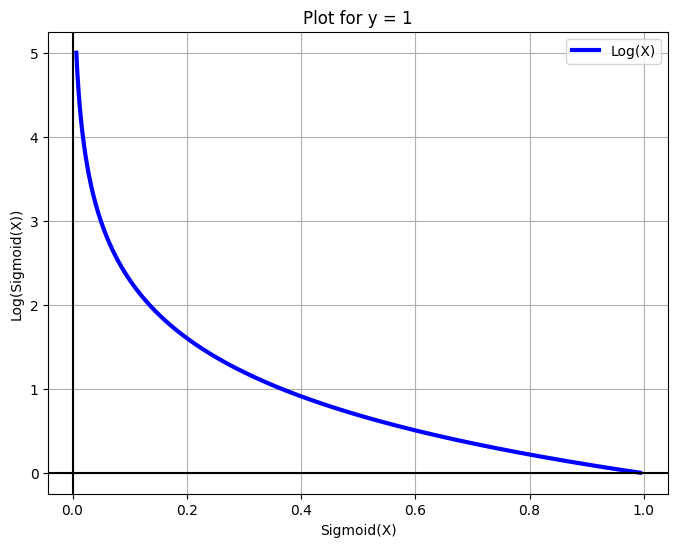

In [2]:
X = np.arange(-5, 5, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(sigmoid(X)), label='Log(X)', c='blue', linewidth=3)
plt.legend()
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('Log(Sigmoid(X))')
plt.title('Plot for y = 1')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

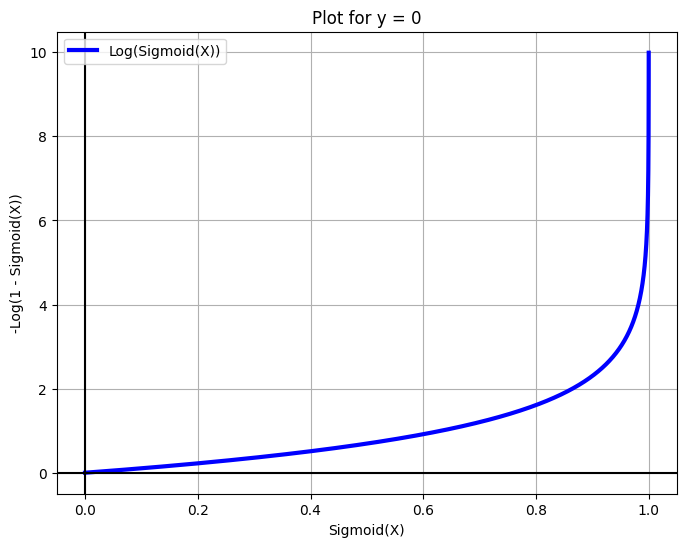

In [3]:
X = np.arange(-10, 10, 0.01)
fig = plt.figure(figsize=(8, 6))
plt.plot(sigmoid(X), -np.log(1 - sigmoid(X)), label='Log(Sigmoid(X))', c='blue', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('Sigmoid(X)')
plt.grid(True)
plt.ylabel('-Log(1 - Sigmoid(X))')
plt.title('Plot for y = 0')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


---

## Cost Function and Optimization Objective for Logistic Regression

Logistic regression aims to find parameters that best predict the probability of an instance belonging to one of two classes. To achieve this, we define a **cost function** (or loss function) that measures how well the model's predictions match the observed data. The cost function is optimized using gradient-based methods to update the model parameters.

### Why a Specific Cost Function?
Unlike linear regression, which uses mean squared error, logistic regression uses a **log-loss** (or **binary cross-entropy**) derived from the negative log-likelihood. This choice is motivated by:
1. **Mathematical Convenience**: Logarithms convert products to sums, simplifying differentiation.
2. **Smoothness**: The function is smooth and differentiable, aiding optimization.
3. **Numerical Stability**: Logarithms handle very small probabilities (e.g., $4 \times 10^{-45}$) effectively.
4. **Convexity**: The negative log-likelihood is convex, ensuring a single global minimum and no local optima.
5. **Probabilistic Interpretation**: It aligns with maximum likelihood estimation (MLE), directly modeling the likelihood of the data.

---

## 1. Cost Function

The cost function measures the error for a single prediction. For a given instance with features $\vec{x}$, true label $y \in \{0, 1\}$, and predicted probability $h_\theta(\vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x})$, the cost is:

$$
\text{Cost}(h_\theta(\vec{x}), y) =
\begin{cases}
-\log(h_\theta(\vec{x})), & \text{if } y = 1 \\
-\log(1 - h_\theta(\vec{x})), & \text{if } y = 0
\end{cases}
$$

where the sigmoid function is:

$$h_\theta(\vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x}) = \frac{1}{1 + e^{-\vec{\theta}^\intercal \vec{x}}}$$

### Intuition
- If $y = 1$, we want $h_\theta(\vec{x}) \approx 1$. If $h_\theta(\vec{x})$ is close to 1, $-\log(h_\theta(\vec{x}))$ is small (low penalty). If $h_\theta(\vec{x})$ is close to 0, $-\log(h_\theta(\vec{x}))$ is large (high penalty).
- If $y = 0$, we want $h_\theta(\vec{x}) \approx 0$. If $h_\theta(\vec{x})$ is close to 0, $-\log(1 - h_\theta(\vec{x}))$ is small. If $h_\theta(\vec{x})$ is close to 1, the penalty is large.

### Compact Form
The piecewise cost can be combined into a single expression:

$$\text{Cost}(h_\theta(\vec{x}), y) = -y \log(h_\theta(\vec{x})) - (1 - y) \log(1 - h_\theta(\vec{x}))$$

- When $y = 1$, the equation becomes $-\log(h_\theta(\vec{x}))$.
- When $y = 0$, it becomes $-\log(1 - h_\theta(\vec{x}))$.

This is the **binary cross-entropy loss** for a single instance.

### Full Cost Function
For a dataset with $m$ instances $\{(\vec{x}^{(i)}, y^{(i)})\}_{i=1}^m$, the total cost function (average loss) is:

$$J(\vec{\theta}) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)})) \right]$$

This is the **negative log-likelihood** averaged over all instances. Minimizing $J(\vec{\theta})$ is equivalent to maximizing the likelihood of the observed data.

---

## 1. **Entropy: Measure of Uncertainty**

Entropy comes from information theory. It quantifies the **uncertainty** or **impurity** in a probability distribution.

### Definition:

For a binary classification problem with a probability $p$ of success (e.g., class 1), the **entropy** is:

$$
H(p) = -p \log_2(p) - (1 - p) \log_2(1 - p)
$$

- Entropy is **0** when the outcome is certain (i.e., $p = 0$ or $p = 1$).
- Entropy is **maximum (1 bit)** when $p = 0.5$.


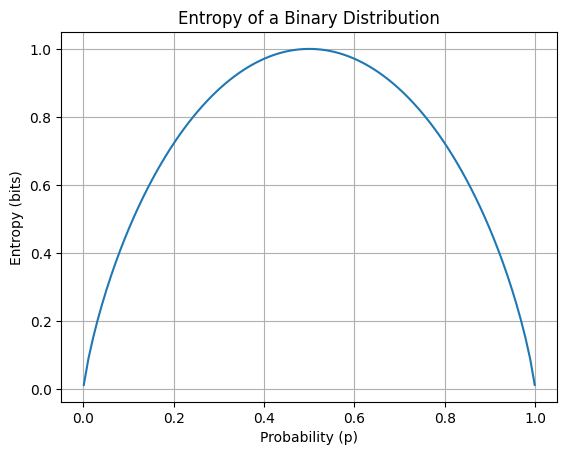

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def entropy(p):
    # Clip to avoid log(0)
    p = np.clip(p, 1e-10, 1 - 1e-10)
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Plot entropy for p in [0, 1]
p_vals = np.linspace(0.001, 0.999, 100)
entropy_vals = entropy(p_vals)

plt.plot(p_vals, entropy_vals)
plt.xlabel("Probability (p)")
plt.ylabel("Entropy (bits)")
plt.title("Entropy of a Binary Distribution")
plt.grid(True)
plt.show()


---

## 2. **Log-Loss / Binary Cross-Entropy**

While entropy measures uncertainty of a **distribution**, **log-loss** (or binary cross-entropy) measures the **error** of a predicted probability $\hat{y}$ compared to the true label $y \in \{0, 1\}$.

### Formula:

For a single prediction:

$$
\text{LogLoss}(y, \hat{y}) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

- If $y = 1$, only the $\log(\hat{y})$ term remains.
- If $y = 0$, only the $\log(1 - \hat{y})$ term remains.

This is the **same formula** as entropy, but with $y$ as the true class and $\hat{y}$ as the predicted probability.



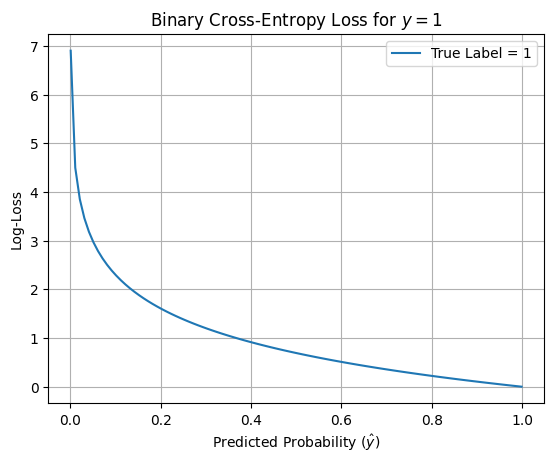

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def log_loss(y_true, y_pred):
    # Clip to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example: true label is 1
y_true = 1
y_preds = np.linspace(0.001, 0.999, 100)
losses = [log_loss(y_true, y) for y in y_preds]

plt.plot(y_preds, losses, label=r'True Label = 1')
plt.xlabel(r"Predicted Probability ($\hat{y}$)")
plt.ylabel(r"Log-Loss")
plt.title(r"Binary Cross-Entropy Loss for $y = 1$")
plt.grid(True)
plt.legend()
plt.show()




## 2. Connection to Maximum Likelihood Estimation (MLE)

### Likelihood Function
For a binary classification dataset, the probability of the observed label $y_i$ given features $\vec{x}_i$ is:

$$P(y_i|\vec{x}_i, \vec{\theta}) = h_\theta(\vec{x}_i)^{y_i} \cdot (1 - h_\theta(\vec{x}_i))^{1 - y_i}$$

Assuming independence of instances, the likelihood of the entire dataset is:

$$L(\vec{\theta}) = \prod_{i=1}^m P(y_i|\vec{x}_i, \vec{\theta}) = \prod_{i=1}^m h_\theta(\vec{x}_i)^{y_i} \cdot (1 - h_\theta(\vec{x}_i))^{1 - y_i}$$

### Log-Likelihood
To simplify optimization, we take the logarithm:

$$\ell(\vec{\theta}) = \log L(\vec{\theta}) = \sum_{i=1}^m \left[ y_i \log h_\theta(\vec{x}_i) + (1 - y_i) \log (1 - h_\theta(\vec{x}_i)) \right]$$

The cost function $J(\vec{\theta})$ is the negative log-likelihood scaled by $\frac{1}{m}$:

$$J(\vec{\theta}) = -\frac{1}{m} \ell(\vec{\theta})$$

Maximizing $\ell(\vec{\theta})$ (likelihood) is equivalent to minimizing $J(\vec{\theta})$ (loss).

---



## 3. Gradient Descent and Parameter Updates

To minimize $J(\vec{\theta})$, we use **gradient descent**. We need the gradient of $J(\vec{\theta})$ with respect to each parameter $\theta_j$.

### Gradient of the Sigmoid
Recall the sigmoid function and its derivative:

$$\sigma(z) = \frac{1}{1 + e^{-z}}, \quad \frac{d}{dz} \sigma(z) = \sigma(z) \cdot (1 - \sigma(z))$$

For $h_\theta(\vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x})$, the partial derivative with respect to $\theta_j$ is:

$$\frac{\partial}{\partial \theta_j} h_\theta(\vec{x}) = \frac{\partial}{\partial \theta_j} \sigma(\vec{\theta}^\intercal \vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x}) \cdot (1 - \sigma(\vec{\theta}^\intercal \vec{x})) \cdot \frac{\partial}{\partial \theta_j} (\vec{\theta}^\intercal \vec{x})$$

Since $\vec{\theta}^\intercal \vec{x} = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$, we have:

$$\frac{\partial}{\partial \theta_j} (\vec{\theta}^\intercal \vec{x}) = x_j$$

Thus:

$$\frac{\partial}{\partial \theta_j} h_\theta(\vec{x}) = h_\theta(\vec{x}) \cdot (1 - h_\theta(\vec{x})) \cdot x_j$$

### Gradient of the Cost Function
Now, compute the partial derivative of $J(\vec{\theta})$:

$$J(\vec{\theta}) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)})) \right]$$

Differentiate with respect to $\theta_j$:

$$\frac{\partial J(\vec{\theta})}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^m \frac{\partial}{\partial \theta_j} \left[ y^{(i)} \log(h_\theta(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)})) \right]$$

For a single term:

$$\frac{\partial}{\partial \theta_j} \left[ y^{(i)} \log(h_\theta(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)})) \right]$$

Apply the chain rule:

- First term: $y^{(i)} \log(h_\theta(\vec{x}^{(i)}))$

$$\frac{\partial}{\partial \theta_j} \left[ y^{(i)} \log(h_\theta(\vec{x}^{(i)})) \right] = y^{(i)} \cdot \frac{1}{h_\theta(\vec{x}^{(i)})} \cdot \frac{\partial}{\partial \theta_j} h_\theta(\vec{x}^{(i)})$$

- Second term: $(1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)}))$

$$\frac{\partial}{\partial \theta_j} \left[ (1 - y^{(i)}) \log(1 - h_\theta(\vec{x}^{(i)})) \right] = (1 - y^{(i)}) \cdot \frac{1}{1 - h_\theta(\vec{x}^{(i)})} \cdot \frac{\partial}{\partial \theta_j} (1 - h_\theta(\vec{x}^{(i)}))$$

Since $\frac{\partial}{\partial \theta_j} (1 - h_\theta(\vec{x}^{(i)})) = -\frac{\partial}{\partial \theta_j} h_\theta(\vec{x}^{(i)})$, we get:

$$= (1 - y^{(i)}) \cdot \frac{1}{1 - h_\theta(\vec{x}^{(i)})} \cdot \left( -\frac{\partial}{\partial \theta_j} h_\theta(\vec{x}^{(i)}) \right)$$

Combine:

$$\frac{\partial}{\partial \theta_j} = \frac{y^{(i)}}{h_\theta(\vec{x}^{(i)})} \cdot \frac{\partial h_\theta(\vec{x}^{(i)})}{\partial \theta_j} - \frac{1 - y^{(i)}}{1 - h_\theta(\vec{x}^{(i)})} \cdot \frac{\partial h_\theta(\vec{x}^{(i)})}{\partial \theta_j}$$

Factor out $\frac{\partial h_\theta(\vec{x}^{(i)})}{\partial \theta_j}$:

$$= \left( \frac{y^{(i)}}{h_\theta(\vec{x}^{(i)})} - \frac{1 - y^{(i)}}{1 - h_\theta(\vec{x}^{(i)})} \right) \cdot \frac{\partial h_\theta(\vec{x}^{(i)})}{\partial \theta_j}$$

Simplify the expression inside:

$$\frac{y^{(i)}}{h_\theta(\vec{x}^{(i)})} - \frac{1 - y^{(i)}}{1 - h_\theta(\vec{x}^{(i)})} = \frac{y^{(i)} (1 - h_\theta(\vec{x}^{(i)})) - (1 - y^{(i)}) h_\theta(\vec{x}^{(i)})}{h_\theta(\vec{x}^{(i)}) (1 - h_\theta(\vec{x}^{(i)}))}$$

Numerator:

$$y^{(i)} (1 - h_\theta(\vec{x}^{(i)})) - (1 - y^{(i)}) h_\theta(\vec{x}^{(i)}) = y^{(i)} - y^{(i)} h_\theta(\vec{x}^{(i)}) - h_\theta(\vec{x}^{(i)}) + y^{(i)} h_\theta(\vec{x}^{(i)}) = y^{(i)} - h_\theta(\vec{x}^{(i)})$$

So:

$$\frac{y^{(i)} - h_\theta(\vec{x}^{(i)})}{h_\theta(\vec{x}^{(i)}) (1 - h_\theta(\vec{x}^{(i)}))}$$

Now substitute $\frac{\partial h_\theta(\vec{x}^{(i)})}{\partial \theta_j} = h_\theta(\vec{x}^{(i)}) (1 - h_\theta(\vec{x}^{(i)})) x_j^{(i)}$:

$$\frac{\partial}{\partial \theta_j} = \frac{y^{(i)} - h_\theta(\vec{x}^{(i)})}{h_\theta(\vec{x}^{(i)}) (1 - h_\theta(\vec{x}^{(i)}))} \cdot h_\theta(\vec{x}^{(i)}) (1 - h_\theta(\vec{x}^{(i)})) x_j^{(i)}$$

The denominator cancels, leaving:

$$= (y^{(i)} - h_\theta(\vec{x}^{(i)})) x_j^{(i)}$$

Thus, the full gradient is:

$$\frac{\partial J(\vec{\theta})}{\partial \theta_j} = -\frac{1}{m} \sum_{i=1}^m (y^{(i)} - h_\theta(\vec{x}^{(i)})) x_j^{(i)}$$

For gradient descent, we update in the direction of the negative gradient, so:

$$\frac{\partial J(\vec{\theta})}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(\vec{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

### Gradient Descent Update Rule
The update rule for each parameter $\theta_j$ is:

$$\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\vec{\theta})}{\partial \theta_j} = \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m (h_\theta(\vec{x}^{(i)}) - y^{(i)}) x_j^{(i)}$$

where $\alpha$ is the learning rate. All $\theta_j$ are updated simultaneously until convergence.

### Similarity to Linear Regression
This update rule resembles linear regression's gradient descent, but here, $h_\theta(\vec{x}) = \sigma(\vec{\theta}^\intercal \vec{x})$ is the sigmoid function, not a linear function.

---


## 4. Interpretation of Weights

In logistic regression, the model predicts the log-odds:

$$\ln \left( \frac{P(y=1|\vec{x})}{P(y=0|\vec{x})} \right) = \vec{\theta}^\intercal \vec{x} = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$$

The weight $\theta_j$ represents the change in the **log-odds** for a unit increase in feature $x_j$, holding other features constant. Exponentiating $\theta_j$ gives the odds ratio:

$$e^{\theta_j} = \text{change in odds for a unit increase in } x_j$$

This is different from linear regression, where $\theta_j$ directly represents the change in the output $y$.

---

## 5. Maximum A Posteriori (MAP) Estimation and Regularization

### MAP Estimation
MLE maximizes the likelihood $P(\vec{y}|\vec{X}, \vec{\theta})$. MAP incorporates a prior distribution $P(\vec{\theta})$ and maximizes the posterior:

$$P(\vec{\theta}|\vec{X}, \vec{y}) \propto P(\vec{y}|\vec{X}, \vec{\theta}) \cdot P(\vec{\theta})$$

Taking the logarithm:

$$\vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \log P(\vec{y}|\vec{X}, \vec{\theta}) + \log P(\vec{\theta}) \right]$$

### Gaussian Prior and L2 Regularization
Assume a Gaussian prior on $\vec{\theta}$: $P(\vec{\theta}) \sim \mathcal{N}(0, \sigma^2 \mathbf{I})$. The log-prior is:

$$\log P(\vec{\theta}) \propto -\frac{1}{2\sigma^2} \|\vec{\theta}\|_2^2$$

The MAP objective becomes:

$$\vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \ell(\vec{\theta}) - \frac{\lambda}{2} \|\vec{\theta}\|_2^2 \right], \quad \lambda = \frac{1}{\sigma^2}$$

Equivalently, minimize:

$$J(\vec{\theta}) = -\frac{1}{m} \ell(\vec{\theta}) + \frac{\lambda}{2} \|\vec{\theta}\|_2^2$$

This is the cross-entropy loss plus an **L2 regularization** term, which penalizes large weights to prevent overfitting, similar to ridge regression.

---

### 1. **MAP Estimation: Incorporating Prior Knowledge**
Maximum Likelihood Estimation (MLE) focuses solely on maximizing the likelihood of the data given the model parameters, i.e., $P(\vec{y}|\vec{X}, \vec{\theta})$. However, MLE doesn’t account for prior beliefs about the parameters $\vec{\theta}$. MAP estimation improves on this by incorporating a **prior distribution** $P(\vec{\theta})$, which reflects what we believe about the parameters before seeing the data.

The **posterior probability** of the parameters given the data is given by Bayes’ theorem:

$$ P(\vec{\theta}|\vec{X}, \vec{y}) = \frac{P(\vec{y}|\vec{X}, \vec{\theta}) \cdot P(\vec{\theta})}{P(\vec{y}|\vec{X})} $$

Since $P(\vec{y}|\vec{X})$ is a constant (it doesn’t depend on $\vec{\theta}$), we can maximize the unnormalized posterior:

$$ P(\vec{\theta}|\vec{X}, \vec{y}) \propto P(\vec{y}|\vec{X}, \vec{\theta}) \cdot P(\vec{\theta}) $$

To make optimization easier, we take the **logarithm** (since the log is a monotonic function, it preserves the maximum):

$$ \vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \log P(\vec{y}|\vec{X}, \vec{\theta}) + \log P(\vec{\theta}) \right] $$

Here:
- $\log P(\vec{y}|\vec{X}, \vec{\theta})$ is the **log-likelihood**, same as in MLE.
- $\log P(\vec{\theta})$ is the **log-prior**, which encodes our prior beliefs about $\vec{\theta}$.

The prior acts as a regularizer, guiding the solution toward parameter values that are more likely based on prior knowledge.

### 2. **Gaussian Prior and L2 Regularization**
A common choice for the prior is a **Gaussian distribution** centered at zero, $P(\vec{\theta}) \sim \mathcal{N}(0, \sigma^2 \mathbf{I})$. This assumes that the parameters $\vec{\theta}$ are likely to be small (close to zero), which encourages simpler models and helps prevent overfitting.

The probability density of a Gaussian prior is:

$$ P(\vec{\theta}) \propto e\left( -\frac{1}{2\sigma^2} \|\vec{\theta}\|_2^2 \right) $$

Taking the logarithm:

$$ \log P(\vec{\theta}) \propto -\frac{1}{2\sigma^2} \|\vec{\theta}\|_2^2 $$

Now, substitute this into the MAP objective:

$$ \vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \log P(\vec{y}|\vec{X}, \vec{\theta}) - \frac{1}{2\sigma^2} \|\vec{\theta}\|_2^2 \right] $$

Let’s define $\lambda = \frac{1}{\sigma^2}$, where $\lambda$ controls the strength of the prior (smaller $\sigma^2$ means a stronger belief that $\vec{\theta}$ should be close to zero). The objective becomes:

$$ \vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \ell(\vec{\theta}) - \frac{\lambda}{2} \|\vec{\theta}\|_2^2 \right] $$

where $\ell(\vec{\theta}) = \log P(\vec{y}|\vec{X}, \vec{\theta})$ is the log-likelihood.

To turn this into a **minimization problem** (common in optimization), we negate the objective and scale the log-likelihood by $\frac{1}{m}$ (where $m$ is the number of data points) for numerical stability:

$$ J(\vec{\theta}) = -\frac{1}{m} \ell(\vec{\theta}) + \frac{\lambda}{2} \|\vec{\theta}\|_2^2 $$

This is the **loss function** (e.g., cross-entropy loss for classification) plus an **L2 regularization term** $\frac{\lambda}{2} \|\vec{\theta}\|_2^2$. The L2 term penalizes large values of $\vec{\theta}$, encouraging smaller weights, which leads to simpler models and reduces overfitting. This is mathematically equivalent to **ridge regression** in linear regression.

### 3. **Why L2 Regularization Works**
- **Preventing Overfitting**: Large weights can lead to overly complex models that fit noise in the training data. The L2 penalty discourages large weights, favoring smoother, more generalizable models.
- **Connection to Gaussian Prior**: The L2 term arises naturally from the Gaussian prior, which assumes parameters are likely to be small. The strength of regularization ($\lambda$) is inversely proportional to the variance of the prior ($\sigma^2$).
- **Geometric Interpretation**: The L2 term constrains the solution to lie closer to the origin in parameter space, balancing the trade-off between fitting the data (likelihood) and keeping parameters small (prior).

---

## Small Example: Logistic Regression with MAP and L2 Regularization

Let’s apply MAP estimation with a Gaussian prior to a **logistic regression** problem.

### Problem Setup
Suppose we have a binary classification dataset with $m=2$ data points:
- $\vec{X} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$, $\vec{y} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.
- Model parameters: $\vec{\theta} = \begin{bmatrix} \theta_1 \\ \theta_2 \end{bmatrix}$.
- We assume a Gaussian prior: $P(\vec{\theta}) \sim \mathcal{N}(0, \sigma^2 \mathbf{I})$, with $\sigma^2 = 1$, so $\lambda = \frac{1}{\sigma^2} = 1$.

### Step 1: Log-Likelihood for Logistic Regression
For logistic regression, the likelihood is:

$$ P(\vec{y}|\vec{X}, \vec{\theta}) = \prod_{i=1}^m \sigma(\vec{x}_i^T \vec{\theta})^{y_i} (1 - \sigma(\vec{x}_i^T \vec{\theta}))^{1 - y_i} $$

where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

The log-likelihood is:

$$ \ell(\vec{\theta}) = \sum_{i=1}^m \left[ y_i \log \sigma(\vec{x}_i^T \vec{\theta}) + (1 - y_i) \log (1 - \sigma(\vec{x}_i^T \vec{\theta})) \right] $$

For our data:
- Point 1: $\vec{x}_1 = [1, 2]$, $y_1 = 0$, so $\vec{x}_1^T \vec{\theta} = \theta_1 + 2\theta_2$.
- Point 2: $\vec{x}_2 = [3, 4]$, $y_2 = 1$, so $\vec{x}_2^T \vec{\theta} = 3\theta_1 + 4\theta_2$.

The log-likelihood is:

$$ \ell(\vec{\theta}) = \log (1 - \sigma(\theta_1 + 2\theta_2)) + \log \sigma(3\theta_1 + 4\theta_2) $$

### Step 2: Gaussian Prior
The log-prior with $\sigma^2 = 1$ is:

$$ \log P(\vec{\theta}) \propto -\frac{1}{2} \|\vec{\theta}\|_2^2 = -\frac{1}{2} (\theta_1^2 + \theta_2^2) $$

### Step 3: MAP Objective
The MAP objective is:

$$ \vec{\theta}_{\text{MAP}} = \arg\max_{\vec{\theta}} \left[ \ell(\vec{\theta}) - \frac{1}{2} (\theta_1^2 + \theta_2^2) \right] $$

Equivalently, minimize the loss function (with $m=2$):

$$ J(\vec{\theta}) = -\frac{1}{2} \ell(\vec{\theta}) + \frac{1}{2} (\theta_1^2 + \theta_2^2) $$

### Step 4: Interpretation
- The term $-\frac{1}{2} \ell(\vec{\theta})$ is the average negative log-likelihood (cross-entropy loss).
- The term $\frac{1}{2} (\theta_1^2 + \theta_2^2)$ is the L2 regularization term with $\lambda = 1$.
- To find $\vec{\theta}_{\text{MAP}}$, we’d typically use gradient descent or another optimization method to minimize $J(\vec{\theta})$.

### Step 5: Numerical Intuition
Suppose we test $\vec{\theta} = [0.5, 0.5]$:
- Compute $\vec{x}_1^T \vec{\theta} = 1 \cdot 0.5 + 2 \cdot 0.5 = 1.5$, so $\sigma(1.5) \approx 0.817$.
- Compute $\vec{x}_2^T \vec{\theta} = 3 \cdot 0.5 + 4 \cdot 0.5 = 3.5$, so $\sigma(3.5) \approx 0.970$.
- Log-likelihood: $\ell(\vec{\theta}) \approx \log(1 - 0.817) + \log(0.970) \approx \log(0.183) + \log(0.970) \approx -1.70$.
- L2 term: $\frac{1}{2} (0.5^2 + 0.5^2) = \frac{1}{2} \cdot 0.5 = 0.25$.
- Loss: $J(\vec{\theta}) \approx -\frac{1}{2} \cdot (-1.70) + 0.25 = 0.85 + 0.25 = 1.10$.

The optimizer would adjust $\vec{\theta}$ to minimize $J(\vec{\theta})$, balancing the fit to the data (log-likelihood) and the penalty on large weights (L2 term).




## 6. MLE and MAP in Context

### Maximum Likelihood Estimation (MLE)
- **Goal**: Find $\vec{\theta}$ that maximizes the likelihood $P(\vec{y}|\vec{X}, \vec{\theta})$.
- **Process**: Define the likelihood, take the log, and optimize.
- **Example**: For a coin with $k$ heads in $n$ flips, the likelihood is $L(p) = p^k (1-p)^{n-k}$. The MLE is $\hat{p} = \frac{k}{n}$.

### Maximum A Posteriori (MAP)
- **Goal**: Incorporate prior beliefs $P(\vec{\theta})$ to maximize the posterior.
- **Process**: Combine log-likelihood and log-prior, then optimize.
- **Example**: If you believe a coin is fair (prior $P(p) \sim \text{Beta}$), MAP adjusts the estimate based on both data and prior.

### MLE vs. MAP
- **MLE**: Data-driven, no assumptions about $\vec{\theta}$.
- **MAP**: Incorporates prior knowledge, leading to regularization in practice.

---





## 7. Example: Biased Coin

Consider a dataset of coin flips: $\mathcal{D} = \{H, H, T, H, T\}$ (3 heads, 2 tails).

### Model
- $P_\theta(H) = \theta$
- $P_\theta(T) = 1 - \theta$

### Likelihood
$$L(\theta) = \theta^3 (1 - \theta)^2$$

### Log-Likelihood
$$\ell(\theta) = 3 \log \theta + 2 \log (1 - \theta)$$

### MLE Solution
Differentiate and set to zero:

$$\frac{\partial \ell}{\partial \theta} = \frac{3}{\theta} - \frac{2}{1 - \theta} = 0$$

$$\frac{3}{\theta} = \frac{2}{1 - \theta} \implies 3 (1 - \theta) = 2 \theta \implies 3 - 3\theta = 2\theta \implies 3 = 5\theta \implies \theta = \frac{3}{5} = 0.6$$

The MLE estimate is $\theta = 0.6$, matching the proportion of heads.

---

## 8. Conditional Maximum Likelihood

Logistic regression models the conditional probability $P(y|\vec{x}, \vec{\theta})$. The log-likelihood is:

$$\ell(\vec{\theta}) = \sum_{i=1}^m \log P(y^{(i)}|\vec{x}^{(i)}, \vec{\theta})$$

For logistic regression:

$$P(y=1|\vec{x}, \vec{\theta}) = \sigma(\vec{\theta}^\intercal \vec{x}), \quad P(y=0|\vec{x}, \vec{\theta}) = 1 - \sigma(\vec{\theta}^\intercal \vec{x})$$

Maximizing $\ell(\vec{\theta})$ pushes predictions toward 1 for $y=1$ and 0 for $y=0$.

---


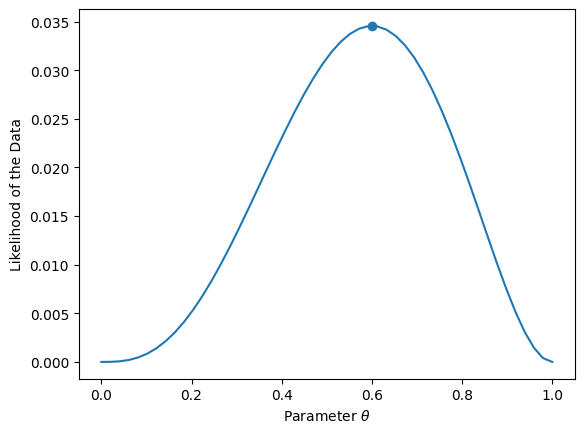

In [6]:
# our dataset is {H, H, T, H, T}; if theta = P(x=H), we get:
coin_likelihood = lambda theta: theta*theta*(1-theta)*theta*(1-theta)

theta_vals = np.linspace(0,1)
plt.ylabel('Likelihood of the Data'); plt.xlabel(r'Parameter $\theta$')
plt.scatter([0.6], [coin_likelihood(0.6)])
plt.plot(theta_vals, coin_likelihood(theta_vals));

In [7]:

def log_likelihood(theta, X, y):
    """The cost function, J(theta0, theta1) describing the goodness of fit.
    
    We added the 1e-6 term in order to avoid overflow (inf and -inf).
    
    Parameters:
    theta (np.array): d-dimensional vector of parameters
    X (np.array): (n,d)-dimensional design matrix
    y (np.array): n-dimensional vector of targets
    """
    return (y*np.log(f(X, theta) + 1e-6) + (1-y)*np.log(1-f(X, theta) + 1e-6)).mean()

In [8]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(0,1,100)

ax.plot(x,cross_entropy(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,cross_entropy(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Predicted probability $\hat{y}$")
ax.set_ylabel("Log loss")
plt.grid()
plt.legend();

NameError: name 'fig_scale' is not defined


## Logistic Regression from Scratch
Below is a Python implementation of logistic regression using NumPy, including gradient descent optimization and L2 regularization.

#### Explanation of Code:
	•	Sigmoid Function: Implements (\sigma(z) = \frac{1}{1 + e^{-z}}).
	•	Loss Function: Computes binary cross-entropy plus L2 regularization.
	•	Gradient Descent: Updates weights and bias using the gradients of the loss.
	•	Prediction: Outputs probabilities (via predict_proba) or class labels (via predict).
	•	Example: Generates synthetic 2D data, trains the model, and plots the loss curve.
#### Notes:
	•	The implementation includes L2 regularization (controlled by lambda_reg), which corresponds to the Gaussian prior in MAP estimation.
	•	A small constant (1e-15) is added to logarithms to avoid numerical issues with (\log(0)).
	•	The synthetic dataset is linearly separable for simplicity, but the model can handle non-separable data.

In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('ex2data1.csv', header=None)
df.rename(columns={0: 'exam1', 1: 'exam2', 2: 'y'}, inplace=True)
df.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


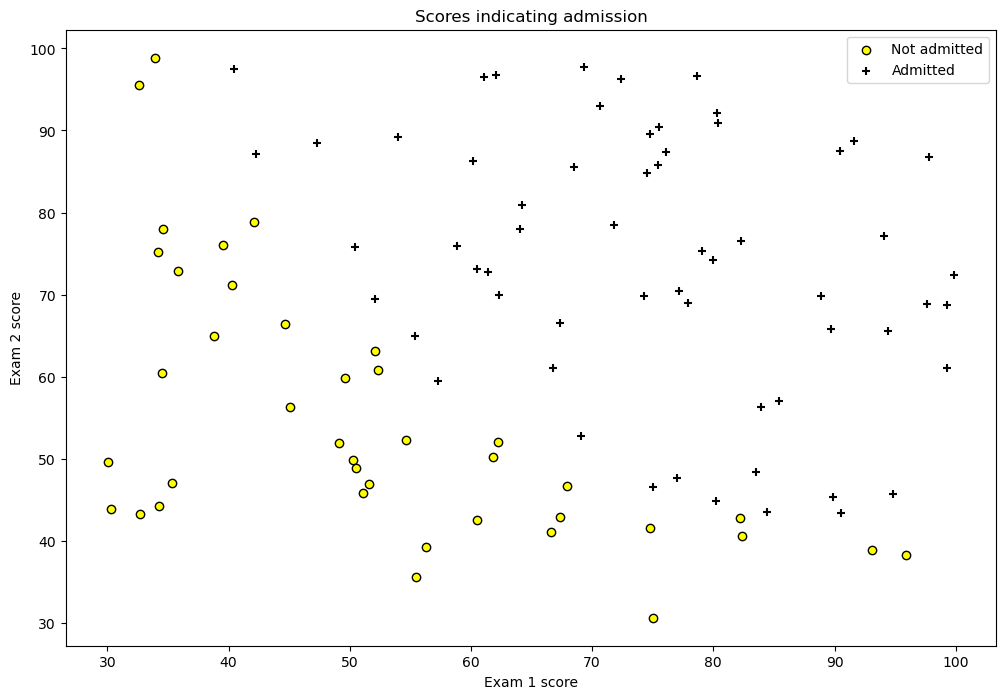

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(df[df['y'] == 0]['exam1'], df[df['y'] == 0]['exam2'],
            label='Not admitted', color='yellow', edgecolor='black')
plt.scatter(df[df['y'] == 1]['exam1'], df[df['y'] == 1]['exam2'],
            label='Admitted', marker='+', color='black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.title('Scores indicating admission')
plt.show()

Accuracy: 0.9900


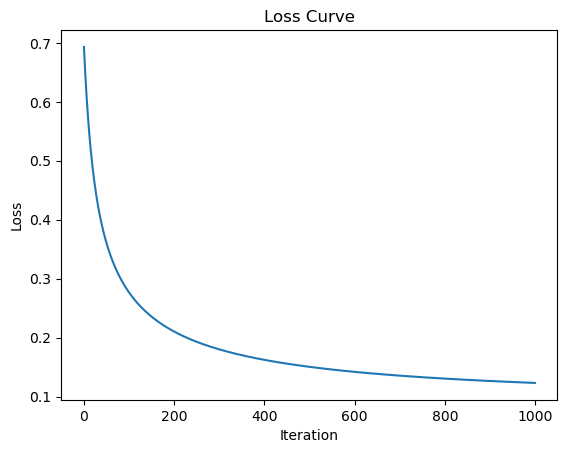

In [8]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, lambda_reg=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_reg = lambda_reg  # Regularization strength
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y, y_pred):
        # Binary cross-entropy loss + L2 regularization
        N = len(y)
        cross_entropy = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
        l2_penalty = (self.lambda_reg / (2 * N)) * np.sum(self.weights ** 2)
        return cross_entropy + l2_penalty

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Compute loss
            loss = self.compute_loss(X, y, y_pred)
            self.losses.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.lambda_reg / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    # Train model
    model = LogisticRegression(learning_rate=0.1, n_iterations=1000, lambda_reg=0.1)
    model.fit(X, y)

    # Predict
    y_pred = model.predict(X)
    accuracy = np.mean(y_pred == y)
    print(f"Accuracy: {accuracy:.4f}")

    # Plot loss curve
    import matplotlib.pyplot as plt
    plt.plot(model.losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()


---

## Softmax Regression Explained

Softmax regression (also known as multinomial logistic regression) is a **multi-class classification algorithm** that generalizes logistic regression to handle more than two classes. It predicts the probability that an input belongs to each of $K$ possible classes, making it suitable for problems like classifying images into multiple categories (e.g., digits 0–9 in MNIST).

### Key Components
1. **Score Computation**: Computes a score for each class based on a linear combination of input features and class-specific parameters.
2. **Softmax Function**: Converts scores into probabilities that sum to 1, representing the likelihood of each class.
3. **Optimization**: Trains the model by maximizing the likelihood of the observed data using a loss function (negative log-likelihood).

Despite the name "regression," softmax regression is used for **classification**, as it outputs class probabilities.

---

## 1. Model Formulation

Softmax regression maps an input $\vec{x} \in \mathbb{R}^d$ to a probability distribution over $K$ classes, producing a vector of probabilities:

$$f_\theta(\vec{x}) \in [0, 1]^K, \quad \sum_{k=1}^K f_\theta(\vec{x})_k = 1$$

### Parameters
- **Parameters**: $\theta = (\theta_1, \theta_2, \ldots, \theta_K)$, where each $\theta_k \in \mathbb{R}^d$ is the parameter vector for class $k$.
- **Parameter Space**: $\Theta = \mathbb{R}^{K \times d}$, a matrix where each row $\theta_k^\top$ corresponds to a class.
- **Input**: $\vec{x} \in \mathbb{R}^d$, the feature vector (often includes a bias term by appending a 1).

### Step 1: Score Computation
For each class $k = 1, \ldots, K$, compute a score (or logit):

$$z_k = \theta_k^\top \vec{x} = \theta_{k1} x_1 + \theta_{k2} x_2 + \cdots + \theta_{kd} x_d$$

The vector of scores is:

$$\vec{z} = (z_1, z_2, \ldots, z_K), \quad z_k = \theta_k^\top \vec{x}$$

### Step 2: Softmax Function
The scores are converted to probabilities using the **softmax function**, which ensures the outputs are positive and sum to 1:

$$\vec{\sigma}(\vec{z})_k = \frac{e(z_k)}{\sum_{l=1}^K e(z_l)}$$

For a given input $\vec{x}$, the probability of class $k$ is:

$$P(y = k | \vec{x}, \theta) = f_\theta(\vec{x})_k = \frac{e(\theta_k^\top \vec{x})}{\sum_{l=1}^K e(\theta_l^\top \vec{x})}$$

### Intuition
- **Exponentiation**: $e(z_k)$ ensures all scores are positive, emphasizing larger scores.
- **Normalization**: Dividing by the sum $\sum_{l=1}^K e(z_l)$ makes the probabilities sum to 1.
- **Competition**: Classes with higher scores $z_k$ get higher probabilities, but the softmax ensures a smooth distribution across all classes.

### Identifiability Note
The model is **over-parametrized**. Adding a constant vector $\vec{c}$ to all $\theta_k$ (i.e., $\theta_k \to \theta_k + \vec{c}$) doesn't change the probabilities because:

$$e((\theta_k + \vec{c})^\top \vec{x}) = e(\theta_k^\top \vec{x}) \cdot e(\vec{c}^\top \vec{x})$$

The $e(\vec{c}^\top \vec{x})$ terms cancel out in the softmax denominator. To address this, we can fix one parameter vector (e.g., $\theta_1 = \vec{0}$) without loss of generality, reducing the parameter space.

---



## Deeper Explanation of the Softmax Function

### 1. **What is the Softmax Function?**
The softmax function is a mathematical operation used to transform a vector of real-valued scores (often called **logits**) into a probability distribution. It is widely used in multi-class classification problems, where the goal is to assign an input to one of $K$ possible classes.

Given a vector of scores $\vec{z} = [z_1, z_2, \dots, z_K] \in \mathbb{R}^K$, the softmax function computes probabilities for each class $k$ as follows:

$$ \vec{\sigma}(\vec{z})_k = \frac{e(z_k)}{\sum_{l=1}^K e(z_l)} $$

Here:
- $e(z_k)$: The exponential function ensures that the output for each class is positive, as $e(z_k) > 0$ for any real $z_k$.
- $\sum_{l=1}^K e(z_l)$: The denominator normalizes the outputs by summing the exponentials of all scores, ensuring that the resulting probabilities sum to 1:

$$ \sum_{k=1}^K \vec{\sigma}(\vec{z})_k = 1 $$

The output $\vec{\sigma}(\vec{z})_k$ represents the probability of class $k$, and the vector $\vec{\sigma}(\vec{z}) = [\vec{\sigma}(\vec{z})_1, \vec{\sigma}(\vec{z})_2, \dots, \vec{\sigma}(\vec{z})_K]$ is a valid probability distribution.

### 2. **Why Use the Softmax Function?**
The softmax function is ideal for multi-class classification because:
- **Positivity**: The exponential ensures all outputs are positive, which is necessary for probabilities.
- **Normalization**: The denominator ensures the outputs sum to 1, making them interpretable as probabilities.
- **Amplifies Differences**: The exponential function exaggerates differences between scores. A larger $z_k$ leads to a much larger $e(z_k)$, assigning higher probability to the corresponding class.
- **Differentiability**: The softmax function is smooth and differentiable, which is crucial for optimization in machine learning (e.g., gradient-based methods like gradient descent).

### 3. **Softmax in Multi-Class Classification**
In a multi-class classification model (e.g., logistic regression for multiple classes or a neural network), the model computes a score for each class based on the input $\vec{x}$ and model parameters $\theta$. For class $k$, the score (or logit) is often computed as a linear combination:

$$ z_k = \theta_k^\top \vec{x} $$

where:
- $\vec{x} \in \mathbb{R}^d$ is the input feature vector.
- $\theta_k \in \mathbb{R}^d$ is the parameter vector (e.g., weights) for class $k$.
- $\theta = [\theta_1, \theta_2, \dots, \theta_K]$ is the collection of parameters for all $K$ classes.

The scores $\vec{z} = [z_1, z_2, \dots, z_K]$ are then passed through the softmax function to obtain the probability of each class:

$$ P(y = k | \vec{x}, \theta) = f_\theta(\vec{x})_k = \frac{e(\theta_k^\top \vec{x})}{\sum_{l=1}^K e(\theta_l^\top \vec{x})} $$

This probability represents the model’s confidence that the input $\vec{x}$ belongs to class $k$. The predicted class is typically the one with the highest probability:

$$ \hat{y} = \arg\max_k P(y = k | \vec{x}, \theta) $$

### 4. **Properties of Softmax**
- **Invariance to Constant Shifts**: Adding a constant $c$ to all scores $z_k$ doesn’t change the output probabilities, because:

$$ \frac{e(z_k + c)}{\sum_{l=1}^K e(z_l + c)} = \frac{e(z_k) \cdot e(c)}{\sum_{l=1}^K e(z_l) \cdot e(c)} = \frac{e(z_k)}{\sum_{l=1}^K e(z_l)} $$

This property is useful numerically, as subtracting the maximum score (i.e., $z_{\text{max}}$) from all scores can prevent overflow in computations:

$$ \vec{\sigma}(\vec{z})_k = \frac{e(z_k - z_{\text{max}})}{\sum_{l=1}^K e(z_l - z_{\text{max}})} $$

- **Sensitivity to Score Differences**: The exponential amplifies differences between scores. If $z_k$ is much larger than the others, $\vec{\sigma}(\vec{z})_k$ will be close to 1, and the others will be close to 0.

---

## Small Example: Applying the Softmax Function

Let’s walk through a concrete example to illustrate how the softmax function works in a multi-class classification setting.

### Problem Setup
Suppose we have a classification problem with $K = 3$ classes (e.g., classifying an image as a cat, dog, or bird). For a given input $\vec{x}$, a model computes scores for each class based on parameters $\theta$. Let’s assume:

- Input: $\vec{x} = [1, 2]$ (e.g., features extracted from an image).
- Parameters for each class:
  - Class 1 (cat): $\theta_1 = [0.5, 1.0]$
  - Class 2 (dog): $\theta_2 = [1.0, 0.5]$
  - Class 3 (bird): $\theta_3 = [-0.5, 0.5]$

### Step 1: Compute Scores (Logits)
Calculate the score for each class using $z_k = \theta_k^\top \vec{x}$:

- Class 1: $z_1 = \theta_1^\top \vec{x} = 0.5 \cdot 1 + 1.0 \cdot 2 = 0.5 + 2.0 = 2.5$
- Class 2: $z_2 = \theta_2^\top \vec{x} = 1.0 \cdot 1 + 0.5 \cdot 2 = 1.0 + 1.0 = 2.0$
- Class 3: $z_3 = \theta_3^\top \vec{x} = -0.5 \cdot 1 + 0.5 \cdot 2 = -0.5 + 1.0 = 0.5$

So, the score vector is:

$$ \vec{z} = [2.5, 2.0, 0.5] $$

### Step 2: Apply the Softmax Function
Compute the softmax probabilities:

$$ \vec{\sigma}(\vec{z})_k = \frac{e(z_k)}{\sum_{l=1}^3 e(z_l)} $$

First, calculate the exponentials:
- $e(z_1) = e(2.5) \approx 12.182$
- $e(z_2) = e(2.0) \approx 7.389$
- $e(z_3) = e(0.5) \approx 1.649$

Sum the exponentials:

$$ \sum_{l=1}^3 e(z_l) \approx 12.182 + 7.389 + 1.649 = 21.220 $$

Now compute the probabilities:
- Class 1: $\vec{\sigma}(\vec{z})_1 = \frac{e(2.5)}{21.220} \approx \frac{12.182}{21.220} \approx 0.574$
- Class 2: $\vec{\sigma}(\vec{z})_2 = \frac{e(2.0)}{21.220} \approx \frac{7.389}{21.220} \approx 0.348$
- Class 3: $\vec{\sigma}(\vec{z})_3 = \frac{e(0.5)}{21.220} \approx \frac{1.649}{21.220} \approx 0.078$

The probability distribution is:

$$ P(y = \text{cat} | \vec{x}, \theta) \approx 0.574, \quad P(y = \text{dog} | \vec{x}, \theta) \approx 0.348, \quad P(y = \text{bird} | \vec{x}, \theta) \approx 0.078 $$

### Step 3: Interpretation
- The model assigns the highest probability (57.4%) to the “cat” class, so the predicted class is “cat”:

$$ \hat{y} = \arg\max_k P(y = k | \vec{x}, \theta) = \text{cat} $$

- The probabilities sum to 1: $0.574 + 0.348 + 0.078 \approx 1.000$.
- The exponential in the softmax amplifies the effect of the highest score ($z_1 = 2.5$), giving the “cat” class a significantly higher probability than the others.

### Step 4: Numerical Stability (Optional)
To avoid numerical overflow (e.g., if scores are very large), we can subtract the maximum score ($z_{\text{max}} = 2.5$) from all scores:
- Adjusted scores: $[2.5 - 2.5, 2.0 - 2.5, 0.5 - 2.5] = [0, -0.5, -2.0]$
- Exponentials: $e(0) = 1$, $e(-0.5) \approx 0.607$, $e(-2.0) \approx 0.135$
- Sum: $1 + 0.607 + 0.135 \approx 1.742$
- Probabilities:
  - Class 1: $\frac{1}{1.742} \approx 0.574$
  - Class 2: $\frac{0.607}{1.742} \approx 0.348$
  - Class 3: $\frac{0.135}{1.742} \approx 0.078$

The results are identical, but the computation is more stable.


## 2. Probabilistic Interpretation

Softmax regression models the conditional probability of the class label $y \in \{1, 2, \ldots, K\}$ given the input $\vec{x}$:

$$P(y = k | \vec{x}, \theta) = \frac{e(\theta_k^\top \vec{x})}{\sum_{l=1}^K e(\theta_l^\top \vec{x})}$$

This defines a **categorical distribution** over the $K$ classes. The model assigns higher probabilities to classes whose parameter vectors $\theta_k$ are more aligned with the input $\vec{x}$ (i.e., larger $\theta_k^\top \vec{x}$).

### Decision Rule
To classify an input, choose the class with the highest probability:

$$\hat{y} = \arg\max_{k} P(y = k | \vec{x}, \theta) = \arg\max_{k} \theta_k^\top \vec{x}$$

Since the softmax is monotonic, this is equivalent to picking the class with the highest score $z_k$.

---



## 3. Learning Objective: Maximum Likelihood Estimation (MLE)

The goal is to find the parameters $\theta$ that maximize the likelihood of the observed data.

### Dataset
Consider a dataset:

$$\mathcal{D} = \{(\vec{x}^{(i)}, y^{(i)})\}_{i=1}^n$$

where:
- $\vec{x}^{(i)} \in \mathbb{R}^d$: Feature vector for the $i$-th instance.
- $y^{(i)} \in \{1, 2, \ldots, K\}$: True class label.

### Likelihood Function
The probability of observing label $y^{(i)}$ given $\vec{x}^{(i)}$ is:

$$P(y^{(i)} | \vec{x}^{(i)}, \theta) = \frac{e(\theta_{y^{(i)}}^\top \vec{x}^{(i)})}{\sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})}$$

Assuming the instances are independent, the likelihood is:

$$L(\theta) = \prod_{i=1}^n P(y^{(i)} | \vec{x}^{(i)}, \theta) = \prod_{i=1}^n \frac{e(\theta_{y^{(i)}}^\top \vec{x}^{(i)})}{\sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})}$$

### Log-Likelihood
To simplify optimization, take the logarithm:

$$\ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log P(y^{(i)} | \vec{x}^{(i)}, \theta)$$

Substitute the probability:

$$\ell(\theta) = \sum_{i=1}^n \left[ \log \left( e(\theta_{y^{(i)}}^\top \vec{x}^{(i)}) \right) - \log \left( \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right) \right]$$

$$= \sum_{i=1}^n \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right]$$

### Cost Function
In practice, we minimize the **negative log-likelihood** (cross-entropy loss), averaged over the dataset:

$$J(\theta) = -\frac{1}{n} \ell(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right]$$

This is the **multinomial cross-entropy loss**. Minimizing $J(\theta)$ is equivalent to maximizing the likelihood.

---



## 4. Gradient of the Cost Function

To optimize $J(\theta)$ using gradient descent, we need the gradient with respect to $\theta_k$ for each class $k$.

### Gradient Derivation
The cost function is:

$$J(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right]$$

Define the loss for a single instance $i$:

$$L^{(i)} = \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})$$

We compute the partial derivative with respect to $\theta_m$ (parameters for class $m$):

$$\frac{\partial J(\theta)}{\partial \theta_m} = -\frac{1}{n} \sum_{i=1}^n \frac{\partial L^{(i)}}{\partial \theta_m}$$

For a single instance, differentiate:

$$\frac{\partial L^{(i)}}{\partial \theta_m} = \frac{\partial}{\partial \theta_m} \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right]$$

- **First term**: $\theta_{y^{(i)}}^\top \vec{x}^{(i)}$

This is non-zero only if $m = y^{(i)}$ (since only $\theta_{y^{(i)}}$ involves class $y^{(i)}$):

$$\frac{\partial}{\partial \theta_m} (\theta_{y^{(i)}}^\top \vec{x}^{(i)}) = \begin{cases} 
\vec{x}^{(i)}, & \text{if } m = y^{(i)} \\
0, & \text{otherwise}
\end{cases}$$

Using an indicator function, this is:

$$\mathbb{1}\{m = y^{(i)}\} \cdot \vec{x}^{(i)}$$

- **Second term**: $-\log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})$

Let $Z = \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})$. Then:

$$\frac{\partial}{\partial \theta_m} \log Z = \frac{1}{Z} \cdot \frac{\partial Z}{\partial \theta_m}$$

Compute:

$$\frac{\partial Z}{\partial \theta_m} = \frac{\partial}{\partial \theta_m} \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) = e(\theta_m^\top \vec{x}^{(i)}) \cdot \vec{x}^{(i)}$$

So:

$$\frac{\partial}{\partial \theta_m} \log Z = \frac{e(\theta_m^\top \vec{x}^{(i)}) \cdot \vec{x}^{(i)}}{Z} = P(y = m | \vec{x}^{(i)}, \theta) \cdot \vec{x}^{(i)}$$

Since $P(y = m | \vec{x}^{(i)}, \theta) = \frac{e(\theta_m^\top \vec{x}^{(i)})}{Z}$, the derivative of the second term is:

$$-\frac{\partial}{\partial \theta_m} \log Z = -P(y = m | \vec{x}^{(i)}, \theta) \cdot \vec{x}^{(i)}$$

Combine:

$$\frac{\partial L^{(i)}}{\partial \theta_m} = \mathbb{1}\{m = y^{(i)}\} \cdot \vec{x}^{(i)} - P(y = m | \vec{x}^{(i)}, \theta) \cdot \vec{x}^{(i)}$$

The full gradient is:

$$\frac{\partial J(\theta)}{\partial \theta_m} = -\frac{1}{n} \sum_{i=1}^n \left[ \mathbb{1}\{m = y^{(i)}\} - P(y = m | \vec{x}^{(i)}, \theta) \right] \vec{x}^{(i)}$$

### Intuition
- If $m = y^{(i)}$, the term $\mathbb{1}\{m = y^{(i)}\} = 1$, and the gradient pushes $P(y = m | \vec{x}^{(i)}, \theta)$ toward 1.
- If $m \neq y^{(i)}$, the gradient pushes $P(y = m | \vec{x}^{(i)}, \theta)$ toward 0.
- The difference $\mathbb{1}\{m = y^{(i)}\} - P(y = m | \vec{x}^{(i)}, \theta)$ measures the error in the predicted probability.

### Gradient Descent Update
Update each $\theta_m$ using:

$$\theta_m := \theta_m - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_m} = \theta_m + \alpha \cdot \frac{1}{n} \sum_{i=1}^n \left[ \mathbb{1}\{m = y^{(i)}\} - P(y = m | \vec{x}^{(i)}, \theta) \right] \vec{x}^{(i)}$$

where $\alpha$ is the learning rate.




---

## 5. Connection to Logistic Regression

Softmax regression generalizes **logistic regression**:
- For $K = 2$, softmax regression reduces to logistic regression.
- Let class 1 have probability $p = \frac{\exp(\theta_1^\top \vec{x})}{\exp(\theta_1^\top \vec{x}) + \exp(\theta_2^\top \vec{x})}$. Set $\theta = \theta_1 - \theta_2$, then:

$$p = \frac{\exp(\theta_1^\top \vec{x})}{\exp(\theta_1^\top \vec{x}) + \exp(\theta_2^\top \vec{x})} = \frac{1}{1 + \exp(-(\theta_1^\top \vec{x} - \theta_2^\top \vec{x}))} = \sigma(\theta^\top \vec{x})$$

This matches the logistic regression sigmoid function.



---

$e^\theta$ is same as $exp(\theta)$

starting with:
$$p = \frac{e(\theta_1^\top \vec{x})}{e(\theta_1^\top \vec{x}) + e(\theta_2^\top \vec{x})}$$

Then you performed the following algebraic manipulations:

1.  **Divide numerator and denominator by $e(\theta_1^\top \vec{x})$:**
    $$p = \frac{\frac{e(\theta_1^\top \vec{x})}{e(\theta_1^\top \vec{x})}}{\frac{e(\theta_1^\top \vec{x})}{e(\theta_1^\top \vec{x})} + \frac{e(\theta_2^\top \vec{x})}{e(\theta_1^\top \vec{x})}} = \frac{1}{1 + e(\theta_2^\top \vec{x} - \theta_1^\top \vec{x})}$$

2.  **Introduce $\theta = \theta_1 - \theta_2$:**
    Notice that $\theta_2^\top \vec{x} - \theta_1^\top \vec{x} = -(\theta_1^\top \vec{x} - \theta_2^\top \vec{x}) = -(\theta^\top \vec{x})$. Substituting this, you get:
    $$p = \frac{1}{1 + e(-(\theta^\top \vec{x}))}$$

3.  **Recognize the sigmoid function:**
    You correctly identified this as the sigmoid function $\sigma(z) = \frac{1}{1 + e^{-z}}$, where in this case, $z = \theta^\top \vec{x}$.

**So, the $e^z$ format in this context is:**

With $z = \theta^\top \vec{x}$, the probability $p$ can be expressed as:

$$p = \frac{1}{1 + e^{-z}}$$

Alternatively, if you wanted the numerator to explicitly have $e^z$, you could multiply the numerator and denominator of the original expression by $e(-\theta_2^\top \vec{x})$:

$$p = \frac{e(\theta_1^\top \vec{x}) \cdot e(-\theta_2^\top \vec{x})}{(e(\theta_1^\top \vec{x}) + e(\theta_2^\top \vec{x})) \cdot e(-\theta_2^\top \vec{x})}$$$$p = \frac{e(\theta_1^\top \vec{x} - \theta_2^\top \vec{x})}{e(\theta_1^\top \vec{x} - \theta_2^\top \vec{x}) + e(\theta_2^\top \vec{x} - \theta_2^\top \vec{x})}$$$$p = \frac{e((\theta_1 - \theta_2)^\top \vec{x})}{e((\theta_1 - \theta_2)^\top \vec{x}) + e(0)}$$
$$p = \frac{e(\theta^\top \vec{x})}{e(\theta^\top \vec{x}) + 1}$$

If we still define $z = \theta^\top \vec{x}$, then this form is:

$$p = \frac{e^z}{e^z + 1}$$

Both $\frac{1}{1 + e^{-z}}$ and $\frac{e^z}{e^z + 1}$ are equivalent forms of the sigmoid function and represent the probability $p$ in terms of $e^z$. Your derivation correctly arrived at the first form. The second form is just another way to express the same relationship.



---

## 6. Implementation

Softmax regression can be implemented using scikit-learn's `LogisticRegression` with the `multi_class='multinomial'` option:

```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

- **solver='lbfgs'**: Uses a second-order optimization method for efficiency.
- The model automatically handles the softmax function and optimizes the cross-entropy loss.

---


/Users/chandraveshchaudhari/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


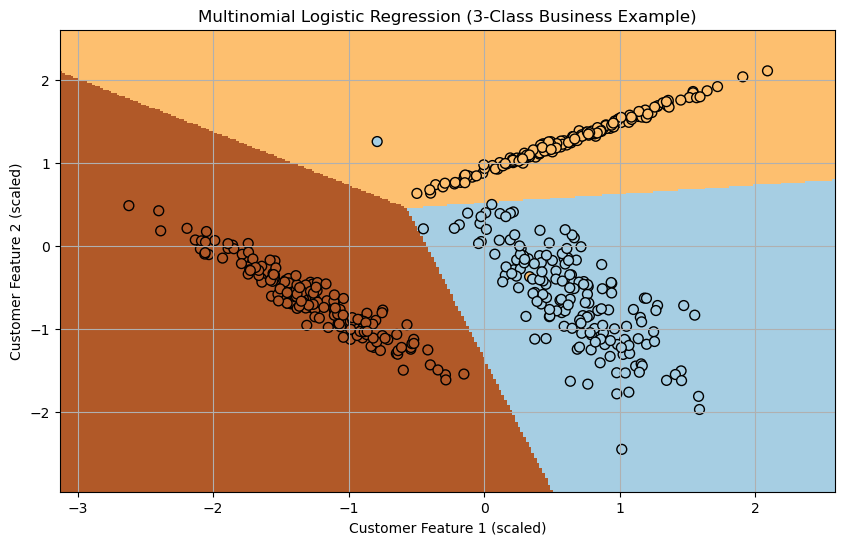

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic business-style 3-class data (e.g., low/medium/high value customers)
X, Y = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    class_sep=2.0,
    random_state=42
)

# 2. Scale features (for stability and visualization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Train multinomial logistic regression (softmax)
logreg = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')
logreg.fit(X, Y)

# 4. Meshgrid for decision boundary plot
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 0.02),
    np.arange(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 0.02)
)

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired, s=50)
plt.xlabel('Customer Feature 1 (scaled)')
plt.ylabel('Customer Feature 2 (scaled)')
plt.title('Multinomial Logistic Regression (3-Class Business Example)')
plt.grid(True)
plt.show()


In [19]:
import numpy as np
from scipy.special import softmax
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000, tol=1e-4, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.classes_ = None
        self.bias = None  # Separate bias term
        
    def _initialize_weights(self, n_features, n_classes):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        # Initialize weights and bias separately
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        self.bias = np.zeros(n_classes)
        
    def _one_hot_encode(self, y):
        self.label_binarizer = LabelBinarizer()
        return self.label_binarizer.fit_transform(y)
    
    def _gradient(self, X, y_true, y_pred):
        # Gradient of cross-entropy loss
        error = y_pred - y_true
        grad_weights = X.T @ error / X.shape[0]
        grad_bias = np.mean(error, axis=0)
        return grad_weights, grad_bias
    
    def fit(self, X, y):
        # Convert labels to one-hot encoding
        y_one_hot = self._one_hot_encode(y)
        self.classes_ = self.label_binarizer.classes_
        n_samples, n_features = X.shape
        n_classes = y_one_hot.shape[1]
        
        # Initialize weights and bias
        self._initialize_weights(n_features, n_classes)
        
        prev_loss = float('inf')
        
        # Gradient descent
        for i in range(self.max_iter):
            # Forward pass: compute predictions
            logits = X @ self.weights + self.bias  # Add bias here
            y_pred = softmax(logits, axis=1)
            
            # Compute loss (cross-entropy)
            loss = -np.mean(np.sum(y_one_hot * np.log(y_pred + 1e-15), axis=1))
            
            # Check for convergence
            if np.abs(prev_loss - loss) < self.tol:
                print(f"Converged at iteration {i}")
                break
            prev_loss = loss
            
            # Backward pass: compute gradients and update parameters
            grad_weights, grad_bias = self._gradient(X, y_one_hot, y_pred)
            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias
            
            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")
    
    def predict_proba(self, X):
        logits = X @ self.weights + self.bias
        return softmax(logits, axis=1)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

# Example usage
if __name__ == "__main__":
    # Load and prepare data
    iris = load_iris()
    X = iris.data
    y = iris.target
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    # Train model
    model = SoftmaxRegression(learning_rate=0.1, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest Accuracy: {accuracy:.4f}")
    
    # Show predictions
    print("\nSample predictions:")
    print("True:", y_test[:5])
    print("Pred:", y_pred[:5])

Iteration 0, Loss: 1.1053
Iteration 100, Loss: 0.3389
Iteration 200, Loss: 0.2699
Iteration 300, Loss: 0.2291
Iteration 400, Loss: 0.2013
Iteration 500, Loss: 0.1810
Iteration 600, Loss: 0.1657
Iteration 700, Loss: 0.1536
Converged at iteration 737

Test Accuracy: 1.0000

Sample predictions:
True: [1 0 2 1 1]
Pred: [1 0 2 1 1]


Iteration 0, Loss: 1.0934
Iteration 100, Loss: 0.8577
Iteration 200, Loss: 0.7380
Iteration 300, Loss: 0.6699
Iteration 400, Loss: 0.6268
Iteration 500, Loss: 0.5973
Iteration 600, Loss: 0.5759
Iteration 700, Loss: 0.5595
Iteration 800, Loss: 0.5466
Converged at iteration 876


/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_9647/1777411610.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0],
/var/folders/93/7lt42x5j7m39kz7wxbcghvrm0000gn/T/ipykernel_9647/1777411610.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


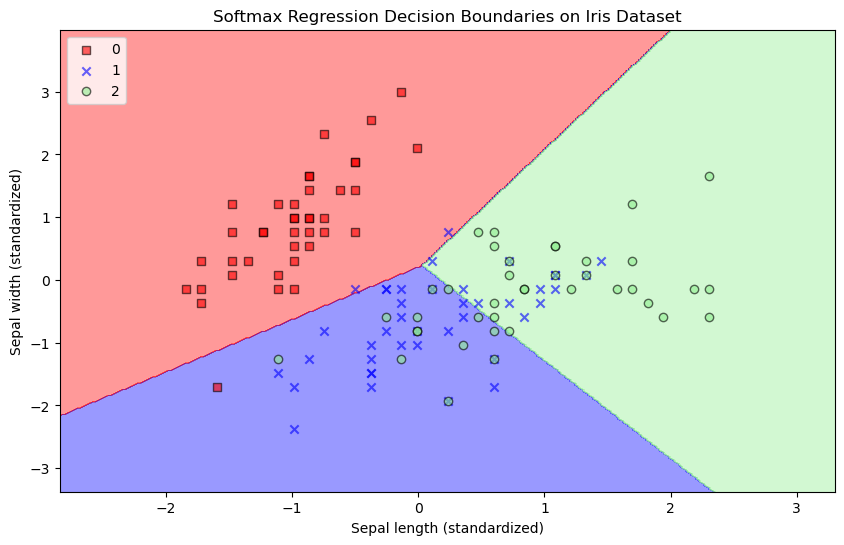

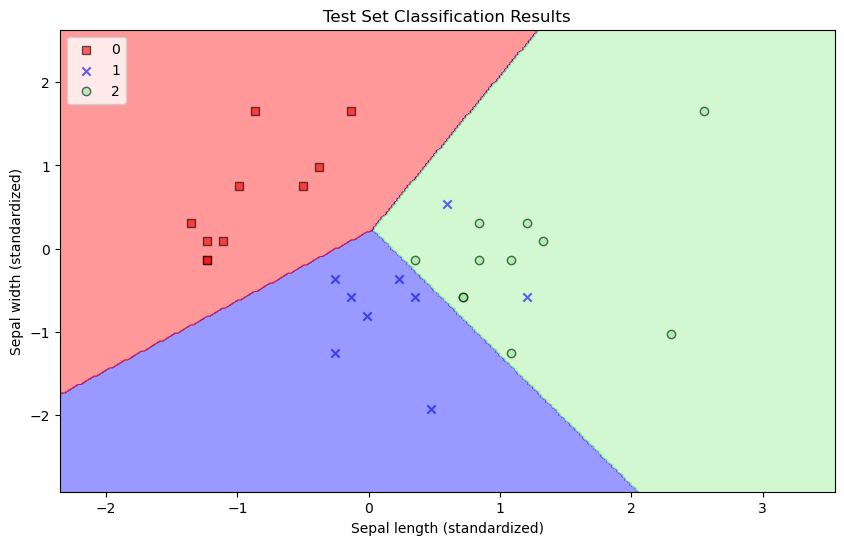

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X, y, model, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Predict for each point in meshgrid
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# Select two features for visualization (sepal length and width)
X_vis = X_train[:, :2]  # Using first two features for visualization

# Retrain model on just these two features
model_vis = SoftmaxRegression(learning_rate=0.01, max_iter=10000, random_state=42)
model_vis.fit(X_vis, y_train)

# Create plot
plt.figure(figsize=(10, 6))
plot_decision_regions(X_vis, y_train, model_vis)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Softmax Regression Decision Boundaries on Iris Dataset')
plt.legend(loc='upper left')
plt.show()

# Also plot the actual test results
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test[:, :2], y_test, model_vis)
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title('Test Set Classification Results')
plt.legend(loc='upper left')
plt.show()

### Information-Theoretic View: Entropy & KL Divergence in Classification

In the context of classification, an information-theoretic perspective provides a framework to understand and quantify uncertainty, information content, and divergence between probability distributions. Two key concepts in this view are **entropy** and **Kullback-Leibler (KL) divergence**. Below, we explore these concepts and their relevance to classification tasks.

---

#### **1. Entropy in Classification**

**Entropy** is a measure of uncertainty or randomness in a probability distribution. In classification, it quantifies the uncertainty associated with predicting the class label of a data point.

- **Definition**: For a discrete random variable $ Y $ representing class labels with probability distribution $ P(Y) $, the entropy $ H(Y) $ is defined as:
  $$
  H(Y) = - \sum_{i=1}^C P(y_i) \log P(y_i)
  $$
  where:
  - $ C $ is the number of classes.
  - $ P(y_i) $ is the probability of class $ y_i $.
  - The logarithm is typically base 2 (for bits) or base $ e $ (for nats).

- **Interpretation**:
  - **High entropy**: The class distribution is uniform (e.g., $ P(y_i) = \frac{1}{C} $), indicating maximum uncertainty. For example, in a binary classification problem with $ P(y_1) = 0.5 $ and $ P(y_2) = 0.5 $, the entropy is $ H(Y) = 1 $ bit.
  - **Low entropy**: The distribution is skewed toward one class (e.g., $ P(y_1) = 0.99, P(y_2) = 0.01 $), indicating low uncertainty.
  - **Zero entropy**: The outcome is certain (e.g., $ P(y_1) = 1, P(y_2) = 0 $).

- **Role in Classification**:
  - **Decision Trees**: Entropy is used in algorithms like ID3 or C4.5 to measure the impurity of a node. The goal is to split the data to minimize entropy (i.e., reduce uncertainty about class labels).
  - **Model Evaluation**: Entropy can help assess the uncertainty in a model's predictions. For example, a model outputting high-entropy (uniform) probability distributions for test samples may indicate poor confidence.
  - **Cross-Entropy Loss**: In training classifiers (e.g., neural networks), the cross-entropy loss measures the difference between the true label distribution and the predicted distribution, effectively penalizing high uncertainty in incorrect predictions.

---

#### **2. KL Divergence in Classification**

**Kullback-Leibler (KL) divergence** measures how much one probability distribution differs from another. In classification, it is often used to compare the predicted probability distribution to the true distribution.

- **Definition**: For two probability distributions $ P $ (true distribution) and $ Q $ (approximated/predicted distribution) over the same set of class labels, the KL divergence is:
  $$
  D_{KL}(P || Q) = \sum_{i=1}^C P(y_i) \log \frac{P(y_i)}{Q(y_i)}
  $$
  - $ D_{KL}(P || Q) \geq 0 $, with equality if and only if $ P = Q $.
  - It is not symmetric: $ D_{KL}(P || Q) \neq D_{KL}(Q || P) $.

- **Interpretation**:
  - KL divergence quantifies the "extra information" (in bits or nats) needed to encode samples from $ P $ using a code optimized for $ Q $.
  - A small KL divergence indicates that $ Q $ is a good approximation of $ P $.
  - A large KL divergence suggests that the predicted distribution $ Q $ deviates significantly from the true distribution $ P $.

- **Role in Classification**:
  - **Cross-Entropy Loss and KL Divergence**: The cross-entropy loss used in classification can be decomposed as:
    $$
    H(P, Q) = H(P) + D_{KL}(P || Q)
    $$
    where:
    - $ H(P, Q) = - \sum_{i=1}^C P(y_i) \log Q(y_i) $ is the cross-entropy.
    - $ H(P) $ is the entropy of the true distribution.
    - $ D_{KL}(P || Q) $ is the KL divergence.
    Since $ H(P) $ is constant for a given true distribution, minimizing the cross-entropy loss is equivalent to minimizing the KL divergence between the true and predicted distributions.
  - **Model Calibration**: KL divergence can be used to evaluate how well a model's predicted probabilities align with the true class distribution. A high KL divergence may indicate miscalibration.
  - **Regularization**: In some models, KL divergence is used as a regularization term. For example, in **variational inference** or **Bayesian neural networks**, KL divergence measures the difference between the learned parameter distribution and a prior distribution.
  - **Domain Adaptation**: KL divergence can quantify the difference between source and target domain distributions, helping to align feature distributions in transfer learning or domain adaptation tasks.

---

#### **3. Practical Implications in Classification**

- **Entropy and Decision Making**:
  - Entropy guides feature selection in decision trees by identifying splits that reduce class uncertainty.
  - In ensemble methods (e.g., random forests), entropy can help assess the diversity of predictions across trees.
  - In active learning, entropy is used to select uncertain samples for labeling, maximizing information gain.

- **KL Divergence and Model Optimization**:
  - During training, minimizing the cross-entropy loss implicitly minimizes the KL divergence, aligning the predicted probabilities with the true labels.
  - In generative models (e.g., GANs or VAEs) used for classification, KL divergence may appear in the objective function to ensure the generated distribution matches the true data distribution.
  - In knowledge distillation, KL divergence is used to transfer knowledge from a teacher model (with a "soft" probability distribution) to a student model.

- **Evaluation Metrics**:
  - While entropy and KL divergence are not typically used directly as evaluation metrics, they underpin metrics like log-loss (cross-entropy) and can inform diagnostic tools for model performance.
  - For example, a model with high cross-entropy loss may have a large KL divergence, indicating poor alignment with the true distribution.

---

#### **4. Example: Binary Classification**

Consider a binary classification problem with true labels $ P(y=1) = 0.7, P(y=0) = 0.3 $, and a model's predicted probabilities $ Q(y=1) = 0.6, Q(y=0) = 0.4 $.

- **Entropy of True Distribution**:
  $$
  H(P) = - [0.7 \log 0.7 + 0.3 \log 0.3] \approx 0.881 \text{ bits}
  $$

- **Cross-Entropy**:
  $$
  H(P, Q) = - [0.7 \log 0.6 + 0.3 \log 0.4] \approx 0.918 \text{ bits}
  $$

- **KL Divergence**:
  $$
  D_{KL}(P || Q) = H(P, Q) - H(P) \approx 0.918 - 0.881 = 0.037 \text{ bits}
  $$
  The KL divergence is small, indicating that the predicted distribution $ Q $ is close to the true distribution $ P $.

---

#### **5. Limitations and Considerations**

- **Entropy**:
  - Entropy assumes a discrete distribution. For continuous variables, differential entropy is used, but it has different properties (e.g., it can be negative).
  - Entropy is sensitive to the number of classes; more classes generally increase entropy unless the distribution is highly skewed.

- **KL Divergence**:
  - KL divergence is asymmetric and not a true distance metric.
  - It can be undefined if $ Q(y_i) = 0 $ for any $ y_i $ where $ P(y_i) > 0 $. Smoothing techniques (e.g., adding a small $ \epsilon $ to probabilities) are often used to avoid this.
  - KL divergence is sensitive to small differences in low-probability events, which may or may not be desirable depending on the application.

- **Computational Considerations**:
  - Estimating entropy and KL divergence requires reliable probability estimates, which can be challenging with limited data or poorly calibrated models.
  - In high-dimensional settings, approximating these quantities may require techniques like Monte Carlo sampling or kernel density estimation.

---

#### **6. Broader Context**

- **Mutual Information**: Entropy is closely related to mutual information, which measures the reduction in uncertainty about one variable (e.g., class labels) given another (e.g., features). Mutual information can guide feature selection in classification.
- **Information Bottleneck**: This framework uses entropy and KL divergence to balance the trade-off between compressing input features and preserving information about the class labels.
- **Robustness and Uncertainty**: Information-theoretic measures can help quantify model robustness to adversarial attacks or distributional shifts by analyzing changes in entropy or KL divergence under perturbations.

---

### Summary

- **Entropy** quantifies the uncertainty in a class distribution, guiding decision-making in algorithms like decision trees and informing loss functions like cross-entropy.
- **KL Divergence** measures the difference between true and predicted distributions, playing a central role in optimizing classifiers and evaluating model calibration.
- Together, these concepts provide a principled way to understand, train, and evaluate classification models, ensuring that predictions align with the true underlying distribution while minimizing uncertainty.



---

## 1. **Multinomial Cross-Entropy Loss (Multi-Class)**
The provided cost function is the **multinomial cross-entropy loss**, used for multi-class classification with $K$ classes. It is derived from the negative log-likelihood of the data under a multinomial logistic regression model (softmax classifier).

### Formula
For a dataset with $n$ examples, the cost function is:

$$ J(\theta) = -\frac{1}{n} \ell(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right] $$

### Explanation
- **Input**: For the $i$-th example, $\vec{x}^{(i)}$ is the feature vector, $y^{(i)} \in \{1, 2, \dots, K\}$ is the true class label, and $\theta_l$ is the parameter vector for class $l$.
- **Probability**: The model predicts the probability of class $k$ using the softmax function:

$$ P(y = k | \vec{x}^{(i)}, \theta) = \frac{e(\theta_k^\top \vec{x}^{(i)})}{\sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)})} $$

- **Log-Likelihood**: The log-likelihood for the $i$-th example is the log of the probability of the true class $y^{(i)}$:

$$ \log P(y = y^{(i)} | \vec{x}^{(i)}, \theta) = \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) $$

- **Cost Function**: The negative average log-likelihood over $n$ examples gives $J(\theta)$, which we minimize to find the optimal parameters $\theta$.

### Key Features
- Applies to **$K \geq 2$ classes**.
- Uses the **softmax function** to compute probabilities across all classes.
- The loss penalizes the model when the predicted probability for the true class is low.

---

## 2. **Binary Cross-Entropy Loss (Two Classes)**
For binary classification (2 classes, typically labeled $y \in \{0, 1\}$), the **binary cross-entropy loss** (also called log loss) is used. It’s a special case of the multinomial cross-entropy loss when $K = 2$, but it’s often written in a simpler form using the sigmoid function.

### Formula
For a dataset with $n$ examples, the binary cross-entropy loss is:

$$ J(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log \hat{p}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{p}^{(i)}) \right] $$

where:
- $\hat{p}^{(i)} = \sigma(\theta^\top \vec{x}^{(i)})$ is the predicted probability of class 1, and $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.
- $y^{(i)} \in \{0, 1\}$ is the true label for the $i$-th example.
- $\theta$ is the parameter vector (single set of weights, unlike the multi-class case).

### Explanation
- **Probability**: The model predicts the probability of class 1 as:

$$ P(y = 1 | \vec{x}^{(i)}, \theta) = \sigma(\theta^\top \vec{x}^{(i)}) = \hat{p}^{(i)} $$

- The probability of class 0 is:

$$ P(y = 0 | \vec{x}^{(i)}, \theta) = 1 - \hat{p}^{(i)} $$

- **Log-Likelihood**: The log-likelihood for the $i$-th example is:

$$ \log P(y = y^{(i)} | \vec{x}^{(i)}, \theta) = y^{(i)} \log \hat{p}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{p}^{(i)}) $$

- **Cost Function**: The negative average log-likelihood gives $J(\theta)$, which is minimized to optimize $\theta$.

### Key Features
- Applies to **exactly 2 classes** ($y = 0$ or $y = 1$).
- Uses the **sigmoid function** to compute the probability of class 1.
- The loss penalizes incorrect predictions by assigning higher loss when the predicted probability $\hat{p}^{(i)}$ is far from the true label $y^{(i)}$.

---

## 3. **Comparison**

| **Aspect**                     | **Multinomial Cross-Entropy (Multi-Class)**                                                                 | **Binary Cross-Entropy (Two Classes)**                                                       |
|--------------------------------|-----------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| **Number of Classes**          | $K \geq 2$ (general case, including 2 or more classes)                                                     | Exactly 2 classes ($y \in \{0, 1\}$)                                                        |
| **Probability Model**          | Softmax: $P(y = k | \vec{x}, \theta) = \frac{e(\theta_k^\top \vec{x})}{\sum_{l=1}^K e(\theta_l^\top \vec{x})}$ | Sigmoid: $P(y = 1 | \vec{x}, \theta) = \sigma(\theta^\top \vec{x})$, $P(y = 0) = 1 - \sigma$ |
| **Parameters**                 | $K$ parameter vectors: $\theta_1, \theta_2, \dots, \theta_K$ (one per class)                               | Single parameter vector: $\theta$                                                           |
| **Loss Formula**               | $J(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ \theta_{y^{(i)}}^\top \vec{x}^{(i)} - \log \sum_{l=1}^K e(\theta_l^\top \vec{x}^{(i)}) \right]$ | $J(\theta) = -\frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log \hat{p}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{p}^{(i)}) \right]$ |
| **Special Case**               | Reduces to binary cross-entropy when $K = 2$ (see below)                                                   | Is a special case of multinomial cross-entropy when $K = 2$                                  |
| **Interpretation**             | Measures how well the predicted probability distribution matches the true class across $K$ classes          | Measures how well the predicted probability for class 1 (or 0) matches the true binary label  |

### Key Insight: Binary Case as a Special Case
When $K = 2$ in the multinomial case, the softmax model can be shown to be equivalent to the sigmoid-based binary model. Let’s derive this briefly:
- For $K = 2$, classes are $y \in \{1, 2\}$ (or relabeled as $\{0, 1\}$). The softmax probabilities are:

$$ P(y = 1 | \vec{x}, \theta) = \frac{e(\theta_1^\top \vec{x})}{e(\theta_1^\top \vec{x}) + e(\theta_2^\top \vec{x})} $$

$$ P(y = 2 | \vec{x}, \theta) = \frac{e(\theta_2^\top \vec{x})}{e(\theta_1^\top \vec{x}) + e(\theta_2^\top \vec{x})} $$

- Divide numerator and denominator by $e(\theta_2^\top \vec{x})$:

$$ P(y = 1 | \vec{x}, \theta) = \frac{e(\theta_1^\top \vec{x} - \theta_2^\top \vec{x})}{1 + e(\theta_1^\top \vec{x} - \theta_2^\top \vec{x})} = \sigma((\theta_1 - \theta_2)^\top \vec{x}) $$

- Let $\theta = \theta_1 - \theta_2$. This matches the sigmoid form: $P(y = 1) = \sigma(\theta^\top \vec{x})$.
- The multinomial loss for $K = 2$ simplifies to the binary cross-entropy loss, confirming they are equivalent up to a reparameterization.

---

## 4. **Small Examples**

### Example 1: Binary Cross-Entropy (2 Classes)
**Setup**:
- Dataset: $n = 2$ examples.
- Example 1: $\vec{x}^{(1)} = [1, 2]$, $y^{(1)} = 1$ (class 1).
- Example 2: $\vec{x}^{(2)} = [3, 4]$, $y^{(2)} = 0$ (class 0).
- Parameters: $\theta = [0.5, 0.5]$.

**Calculation**:
- For example 1: $\theta^\top \vec{x}^{(1)} = 0.5 \cdot 1 + 0.5 \cdot 2 = 1.5$, $\hat{p}^{(1)} = \sigma(1.5) \approx \frac{1}{1 + e^{-1.5}} \approx 0.818$.
- Loss term: $y^{(1)} \log \hat{p}^{(1)} + (1 - y^{(1)}) \log (1 - \hat{p}^{(1)}) = 1 \cdot \log(0.818) + 0 \cdot \log(1 - 0.818) \approx \log(0.818) \approx -0.201$.
- For example 2: $\theta^\top \vec{x}^{(2)} = 0.5 \cdot 3 + 0.5 \cdot 4 = 3.5$, $\hat{p}^{(2)} = \sigma(3.5) \approx 0.970$.
- Loss term: $0 \cdot \log(0.970) + 1 \cdot \log(1 - 0.970) \approx \log(0.030) \approx -3.507$.
- Total loss: $J(\theta) = -\frac{1}{2} [(-0.201) + (-3.507)] \approx \frac{3.708}{2} \approx 1.854$.

### Example 2: Multinomial Cross-Entropy (3 Classes)
**Setup**:
- Dataset: $n = 2$ examples, $K = 3$ classes.
- Example 1: $\vec{x}^{(1)} = [1, 2]$, $y^{(1)} = 2$ (class 2).
- Example 2: $\vec{x}^{(2)} = [3, 4]$, $y^{(2)} = 1$ (class 1).
- Parameters: $\theta_1 = [0.5, 1.0]$, $\theta_2 = [1.0, 0.5]$, $\theta_3 = [-0.5, 0.5]$.

**Calculation**:
- For example 1: Scores are $\theta_1^\top \vec{x}^{(1)} = 0.5 \cdot 1 + 1.0 \cdot 2 = 2.5$, $\theta_2^\top \vec{x}^{(1)} = 1.0 \cdot 1 + 0.5 \cdot 2 = 2.0$, $\theta_3^\top \vec{x}^{(1)} = -0.5 \cdot 1 + 0.5 \cdot 2 = 0.5$.
- Sum of exponentials: $e(2.5) \approx 12.182$, $e(2.0) \approx 7.389$, $e(0.5) \approx 1.649$, total $\approx 21.220$.
- Loss term: $\theta_2^\top \vec{x}^{(1)} - \log \sum_{l=1}^3 e(\theta_l^\top \vec{x}^{(1)}) = 2.0 - \log(21.220) \approx 2.0 - 3.055 \approx -1.055$.
- For example 2: Scores are $\theta_1^\top \vec{x}^{(2)} = 3.5$, $\theta_2^\top \vec{x}^{(2)} = 2.0$, $\theta_3^\top \vec{x}^{(2)} = 1.0$.
- Sum of exponentials: $e(3.5) \approx 33.115$, $e(2.0) \approx 7.389$, $e(1.0) \approx 2.718$, total $\approx 43.222$.
- Loss term: $\theta_1^\top \vec{x}^{(2)} - \log \sum_{l=1}^3 e(\theta_l^\top \vec{x}^{(2)}) = 3.5 - \log(43.222) \approx 3.5 - 3.767 \approx -0.267$.
- Total loss: $J(\theta) = -\frac{1}{2} [(-1.055) + (-0.267)] \approx \frac{1.322}{2} \approx 0.661$.

---